In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Insurance Claims- Fraud Detection
## Problem Statement:
### Business case:
#### Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

#### In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

#### In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Load the data

In [3]:
data = pd.read_csv("insurance.csv")
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [4]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [6]:
data.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

# Checking shape of data

In [7]:
data.shape

(1000, 40)

###  We have 1000 rows and 40 columns

# Sample data

In [8]:
data.sample(16)

months_as_customer  age  policy_number policy_bind_date policy_state  \
786                  85   27         753452       23-07-1996           IL   
240                 249   43         547802       03-09-2013           IL   
116                 107   31         154982       13-02-1991           IL   
820                  65   29         476839       09-08-1990           IL   
532                 169   38         283052       07-01-2005           IL   
433                 143   34         847123       19-03-2014           IL   
723                 103   29         221283       23-08-1994           OH   
140                 211   35         682387       08-03-1998           OH   
13                  121   34         626808       26-10-2012           OH   
883                 115   31         569714       04-12-2005           OH   
575                 182   40         439049       12-12-2011           IN   
141                 287   41         456604       29-03-2004           IL   
4                   228   44         367455       06-06-2014           IL   
265                 394   57         395572       30-03-1999           IL   
996                 285   41         186934       05-01-2014           IL   
574                 102   32         783494       02-09-2014           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
786   500/1000               2000                1174.14               0   
240    250/500               1000                1518.46               0   
116   500/1000               2000                1374.22               0   
820    250/500               1000                1726.91               0   
532    100/300               1000                1555.94               0   
433    100/300                500                1442.27               0   
723   500/1000                500                 914.85               0   
140    100/300               2000                1221.22               0   
13     100/300               1000                 936.61               0   
883   500/1000               1000                1051.67               0   
575    100/300               1000                1022.42               0   
141   500/1000               2000                 968.74               0   
4     500/1000               1000                1583.91         6000000   
265    250/500                500                1401.20               0   
996    100/300               1000                1436.79               0   
574    100/300                500                1537.07         3000000   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
786       602416  ...                      NO              59070        10740   
240       606238  ...                     YES              53500         5350   
116       470603  ...                      NO              51260         9320   
820       456570  ...                       ?               7200          720   
532       459878  ...                     YES              79080         6590   
433       435100  ...                     YES              58500        11700   
723       614867  ...                      NO               7110          790   
140       451586  ...                       ?              52030         9460   
13        464652  ...                      NO               7280         1120   
883       479824  ...                      NO              34160            0   
575       466161  ...                       ?              71100         7110   
141       477519  ...                       ?               5170          470   
4         610706  ...                      NO               6500         1300   
265       619892  ...                      NO               6890         1060   
996       608177  ...                       ?             108480        18080   
574       457733  ...                      NO              47400         9480   

    property_claim vehic

# Describing the data

In [9]:
data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

# Checking for null data

In [10]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Dropping null data column

In [11]:
data.drop(["_c39"], axis = 1, inplace = True)

In [12]:
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [13]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [14]:
data['months_as_customer'].value_counts()

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64

In [15]:
data['age'].value_counts()

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64

In [16]:
data['policy_number'].value_counts()

521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64

In [17]:
data['policy_bind_date'].value_counts()

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

In [18]:
data['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [19]:
data['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [20]:
data['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

In [21]:
data['policy_annual_premium'].value_counts()

1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64

In [22]:
data['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [23]:
data['insured_zip'].value_counts()

477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64

In [24]:
data['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [25]:
data['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [26]:
data['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [27]:
data['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [28]:
data['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [29]:
data['capital-gains'].value_counts()

0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64

In [30]:
data['capital-loss'].value_counts()

 0        475
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64

In [31]:
data['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

In [32]:
data['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [33]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [34]:
data['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [35]:
data['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [36]:
data['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [37]:
data['incident_location'].value_counts()

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

In [38]:
data['incident_hour_of_the_day'].value_counts()

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

In [39]:
data['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

In [40]:
data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [41]:
data['bodily_injuries'].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

In [42]:
data['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

In [43]:
data['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [44]:
data['total_claim_amount'].value_counts()

59400    5
2640     4
70400    4
4320     4
44200    4
        ..
65250    1
87100    1
6240     1
66600    1
67500    1
Name: total_claim_amount, Length: 763, dtype: int64

In [45]:
data['injury_claim'].value_counts()

0        25
640       7
480       7
660       5
580       5
         ..
14840     1
6580      1
11820     1
16650     1
7500      1
Name: injury_claim, Length: 638, dtype: int64

In [46]:
data['property_claim'].value_counts()

0        19
860       6
480       5
660       5
10000     5
         ..
3590      1
6480      1
4580      1
4920      1
7500      1
Name: property_claim, Length: 626, dtype: int64

In [47]:
data['vehicle_claim'].value_counts()

5040     7
3360     6
52080    5
4720     5
3600     5
        ..
43360    1
25130    1
38940    1
47430    1
52500    1
Name: vehicle_claim, Length: 726, dtype: int64

In [48]:
data['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [49]:
data['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [50]:
data['auto_year'].value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [51]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

## Filling ? values

In [52]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# fghjk

In [53]:
#replace the values with mode

print(data['months_as_customer'].mode())

0    194
Name: months_as_customer, dtype: int64


In [54]:
print(data['age'].mode())

0    43
Name: age, dtype: int64


In [55]:
print(data['policy_number'].mode())

0      100804
1      101421
2      104594
3      106186
4      106873
        ...  
995    996253
996    996850
997    998192
998    998865
999    999435
Name: policy_number, Length: 1000, dtype: int64


In [56]:
print(data['policy_bind_date'].mode())

0    01-01-2006
1    05-08-1992
2    28-04-1992
Name: policy_bind_date, dtype: object


In [57]:
print(data['policy_state'].mode())

0    OH
Name: policy_state, dtype: object


In [58]:
print(data['policy_csl'].mode())

0    250/500
Name: policy_csl, dtype: object


In [59]:
print(data['policy_deductable'].mode())

0    1000
Name: policy_deductable, dtype: int64


In [60]:
print(data['policy_annual_premium'].mode())

0    1073.83
1    1074.07
2    1215.36
3    1281.25
4    1362.87
5    1374.22
6    1389.13
7    1524.45
8    1558.29
Name: policy_annual_premium, dtype: float64


In [61]:
print(data['umbrella_limit'].mode())

0    0
Name: umbrella_limit, dtype: int64


In [62]:
print(data['insured_zip'].mode())

0    431202
1    446895
2    456602
3    469429
4    477695
Name: insured_zip, dtype: int64


In [63]:
print(data['insured_sex'].mode())

0    FEMALE
Name: insured_sex, dtype: object


In [64]:
print(data['insured_education_level'].mode())

0    JD
Name: insured_education_level, dtype: object


In [65]:
print(data['insured_occupation'].mode())

0    machine-op-inspct
Name: insured_occupation, dtype: object


In [66]:
print(data['insured_hobbies'].mode())

0    reading
Name: insured_hobbies, dtype: object


In [67]:
print(data['insured_relationship'].mode())

0    own-child
Name: insured_relationship, dtype: object


In [68]:
print(data['capital-gains'].mode())

0    0
Name: capital-gains, dtype: int64


In [69]:
print(data['capital-loss'].mode())

0    0
Name: capital-loss, dtype: int64


In [70]:
print(data['incident_date'].mode())

0    02-02-2015
Name: incident_date, dtype: object


In [71]:
print(data['incident_type'].mode())

0    Multi-vehicle Collision
Name: incident_type, dtype: object


In [72]:
print(data['collision_type'].mode())

0    Rear Collision
Name: collision_type, dtype: object


In [73]:
print(data['incident_severity'].mode())

0    Minor Damage
Name: incident_severity, dtype: object


In [74]:
print(data['authorities_contacted'].mode())

0    Police
Name: authorities_contacted, dtype: object


In [75]:
print(data['incident_state'].mode())

0    NY
Name: incident_state, dtype: object


In [76]:
print(data['incident_city'].mode())

0    Springfield
Name: incident_city, dtype: object


In [77]:
print(data['incident_location'].mode())

0         1012 5th Lane
1         1028 Sky Lane
2        1030 Pine Lane
3      1087 Flute Drive
4        1091 1st Drive
             ...       
995     9929 Rock Drive
996      9935 4th Drive
997       9942 Tree Ave
998    9980 Lincoln Ave
999     9988 Rock Ridge
Name: incident_location, Length: 1000, dtype: object


In [78]:
print(data['incident_hour_of_the_day'].mode())

0    17
Name: incident_hour_of_the_day, dtype: int64


In [79]:
print(data['number_of_vehicles_involved'].mode())

0    1
Name: number_of_vehicles_involved, dtype: int64


In [80]:
print(data['property_damage'].mode())

0    ?
Name: property_damage, dtype: object


In [81]:
print(data['bodily_injuries'].mode())

0    0
Name: bodily_injuries, dtype: int64


In [82]:
print(data['witnesses'].mode())

0    1
Name: witnesses, dtype: int64


In [83]:
print(data['police_report_available'].mode())

0     ?
1    NO
Name: police_report_available, dtype: object


In [84]:
print(data['total_claim_amount'].mode())

0    59400
Name: total_claim_amount, dtype: int64


In [85]:
print(data['injury_claim'].mode())

0    0
Name: injury_claim, dtype: int64


In [86]:
print(data['property_claim'].mode())

0    0
Name: property_claim, dtype: int64


In [87]:
print(data['vehicle_claim'].mode())

0    5040
Name: vehicle_claim, dtype: int64


In [88]:
print(data['auto_make'].mode())

0     Dodge
1      Saab
2    Suburu
Name: auto_make, dtype: object


In [89]:
print(data['auto_model'].mode())

0    RAM
Name: auto_model, dtype: object


In [90]:
print(data['auto_year'].mode())

0    1995
Name: auto_year, dtype: int64


In [91]:
print(data['fraud_reported'].mode())

0    N
Name: fraud_reported, dtype: object


In [92]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [93]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [94]:
data['months_as_customer'] = data['months_as_customer'].replace('?', '194')

In [95]:
data['age'] = data['age'].replace('?', '43')

In [96]:
data['policy_number'] = data['policy_number'].replace('?', '100804')

In [97]:
data['policy_bind_date'] = data['policy_bind_date'].replace('?', '01-01-2006')

In [98]:
data['policy_state'] = data['policy_state'].replace('?', 'OH')

In [99]:
data['policy_csl'] = data['policy_csl'].replace('?', '250/500')

In [100]:
data['policy_deductable'] = data['policy_deductable'].replace('?', '1000')

In [101]:
data['policy_annual_premium'] = data['policy_annual_premium'].replace('?', '1073.83')

In [102]:
data['umbrella_limit'] = data['umbrella_limit'].replace('?', '0')

In [103]:
data['insured_zip'] = data['insured_zip'].replace('?', '431202')

In [104]:
data['insured_sex'] = data['insured_sex'].replace('?', 'FEMALE')

In [105]:
data['insured_education_level'] = data['insured_education_level'].replace('?', 'JD')

In [106]:
data['insured_occupation'] = data['insured_occupation'].replace('?', 'machine-op-inspct')

In [107]:
data['insured_hobbies'] = data['insured_hobbies'].replace('?', 'reading')

In [108]:
data['insured_relationship'] = data['insured_relationship'].replace('?', 'own-child')

In [109]:
data['capital-gains'] = data['capital-gains'].replace('?', '0')

In [110]:
data['capital-loss'] = data['capital-loss'].replace('?', '0')

In [111]:
data['incident_date'] = data['incident_date'].replace('?', '02-02-2015')

In [112]:
data['incident_type'] = data['incident_type'].replace('?', 'Multi-vehicle Collision')

In [113]:
data['collision_type'] = data['collision_type'].replace('?', 'Rear Collision')

In [114]:
data['incident_severity'] = data['incident_severity'].replace('?', 'Minor Damage')

In [115]:
data['authorities_contacted'] = data['authorities_contacted'].replace('?', 'Police')

In [116]:
data['incident_state'] = data['incident_state'].replace('?', 'NY')

In [117]:
data['incident_city'] = data['incident_city'].replace('?', 'Springfield')

In [118]:
data['incident_location'] = data['incident_location'].replace('?', '1012 5th Lane')

In [119]:
data['incident_hour_of_the_day'] = data['incident_hour_of_the_day'].replace('?', '17')

In [120]:
data['number_of_vehicles_involved'] = data['number_of_vehicles_involved'].replace('?', '1')

In [121]:
data['property_damage'] = data['property_damage'].replace('?', 'NO')

In [122]:
data['bodily_injuries'] = data['bodily_injuries'].replace('?', '0')

In [123]:
data['witnesses'] = data['witnesses'].replace('?', '1')

In [124]:
data['police_report_available'] = data['police_report_available'].replace('?', 'NO')

In [125]:
data['total_claim_amount'] = data['total_claim_amount'].replace('?', '59400')

In [126]:
data['injury_claim'] = data['injury_claim'].replace('?', '0')

In [127]:
data['property_claim'] = data['property_claim'].replace('?', '0')

In [128]:
data['vehicle_claim'] = data['vehicle_claim'].replace('?', '5040')

In [129]:
data['auto_make'] = data['auto_make'].replace('?', 'Dodge')

In [130]:
data['auto_model'] = data['auto_model'].replace('?', 'RAM')

In [131]:
data['auto_year'] = data['auto_year'].replace('?', '1995')

In [132]:
data['fraud_reported'] = data['fraud_reported'].replace('?', 'N')

In [133]:
data.sample(16)

months_as_customer  age  policy_number policy_bind_date policy_state  \
571                 241   39         485295       28-04-2005           OH   
274                 217   39         522506       15-03-1992           IL   
71                  222   41         260845       11-11-1998           OH   
846                 285   42         545506       20-03-1991           IN   
757                 173   36         796005       18-08-2007           OH   
56                  439   56         524836       20-11-2008           IN   
355                 256   43         883980       13-12-2014           OH   
591                  43   43         528385       07-11-1997           IL   
254                  20   23         935596       01-05-1999           OH   
175                 324   46         648509       06-03-2010           IN   
325                 399   55         984948       14-04-1993           IL   
887                 441   55         669501       29-07-2009           IN   
291                  59   40         444422       28-09-2011           IL   
702                 396   57         587498       15-10-1996           IL   
72                  199   41         657045       04-12-1995           OH   
357                 110   28         435784       13-07-2013           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
571    250/500               1000                1260.56               0   
274   500/1000               2000                1399.85               0   
71     100/300               2000                1055.53               0   
846    100/300                500                1389.13               0   
757    250/500               1000                1274.63               0   
56     250/500                500                1082.49               0   
355    100/300                500                1203.17               0   
591   500/1000                500                1320.39               0   
254   500/1000               1000                1711.72               0   
175    100/300               2000                 897.89         6000000   
325   500/1000               2000                 995.56               0   
887    250/500                500                1270.29         4000000   
291    250/500               2000                 782.23               0   
702   500/1000                500                1351.72               0   
72     250/500               1000                 895.83               0   
357    250/500               1000                1573.93               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
571       473591  ...         2                     YES              37520   
274       605490  ...         2                      NO              64920   
71        441992  ...         2                      NO              61290   
846       452942  ...         3                      NO              52700   
757       441298  ...         3                      NO              52030   
56        606714  ...         3                      NO              56430   
355       455810  ...         0                      NO              63250   
591       604861  ...         1                      NO              79970   
254       463678  ...         2                      NO              63250   
175       618862  ...         0                     YES              79600   
325       464665  ...         1                     YES              88400   
887       449421  ...         0                      NO               6400   
291       449221  ...         2                      NO              51570   
702       612102  ...         3                      NO               2640   
72        452597  ...         2                      NO              30100   
357       461919  ...         2                      NO              65040   

    injury_claim property_claim  vehicle_claim   auto_make  auto_model  \
5

# Univariate analysis

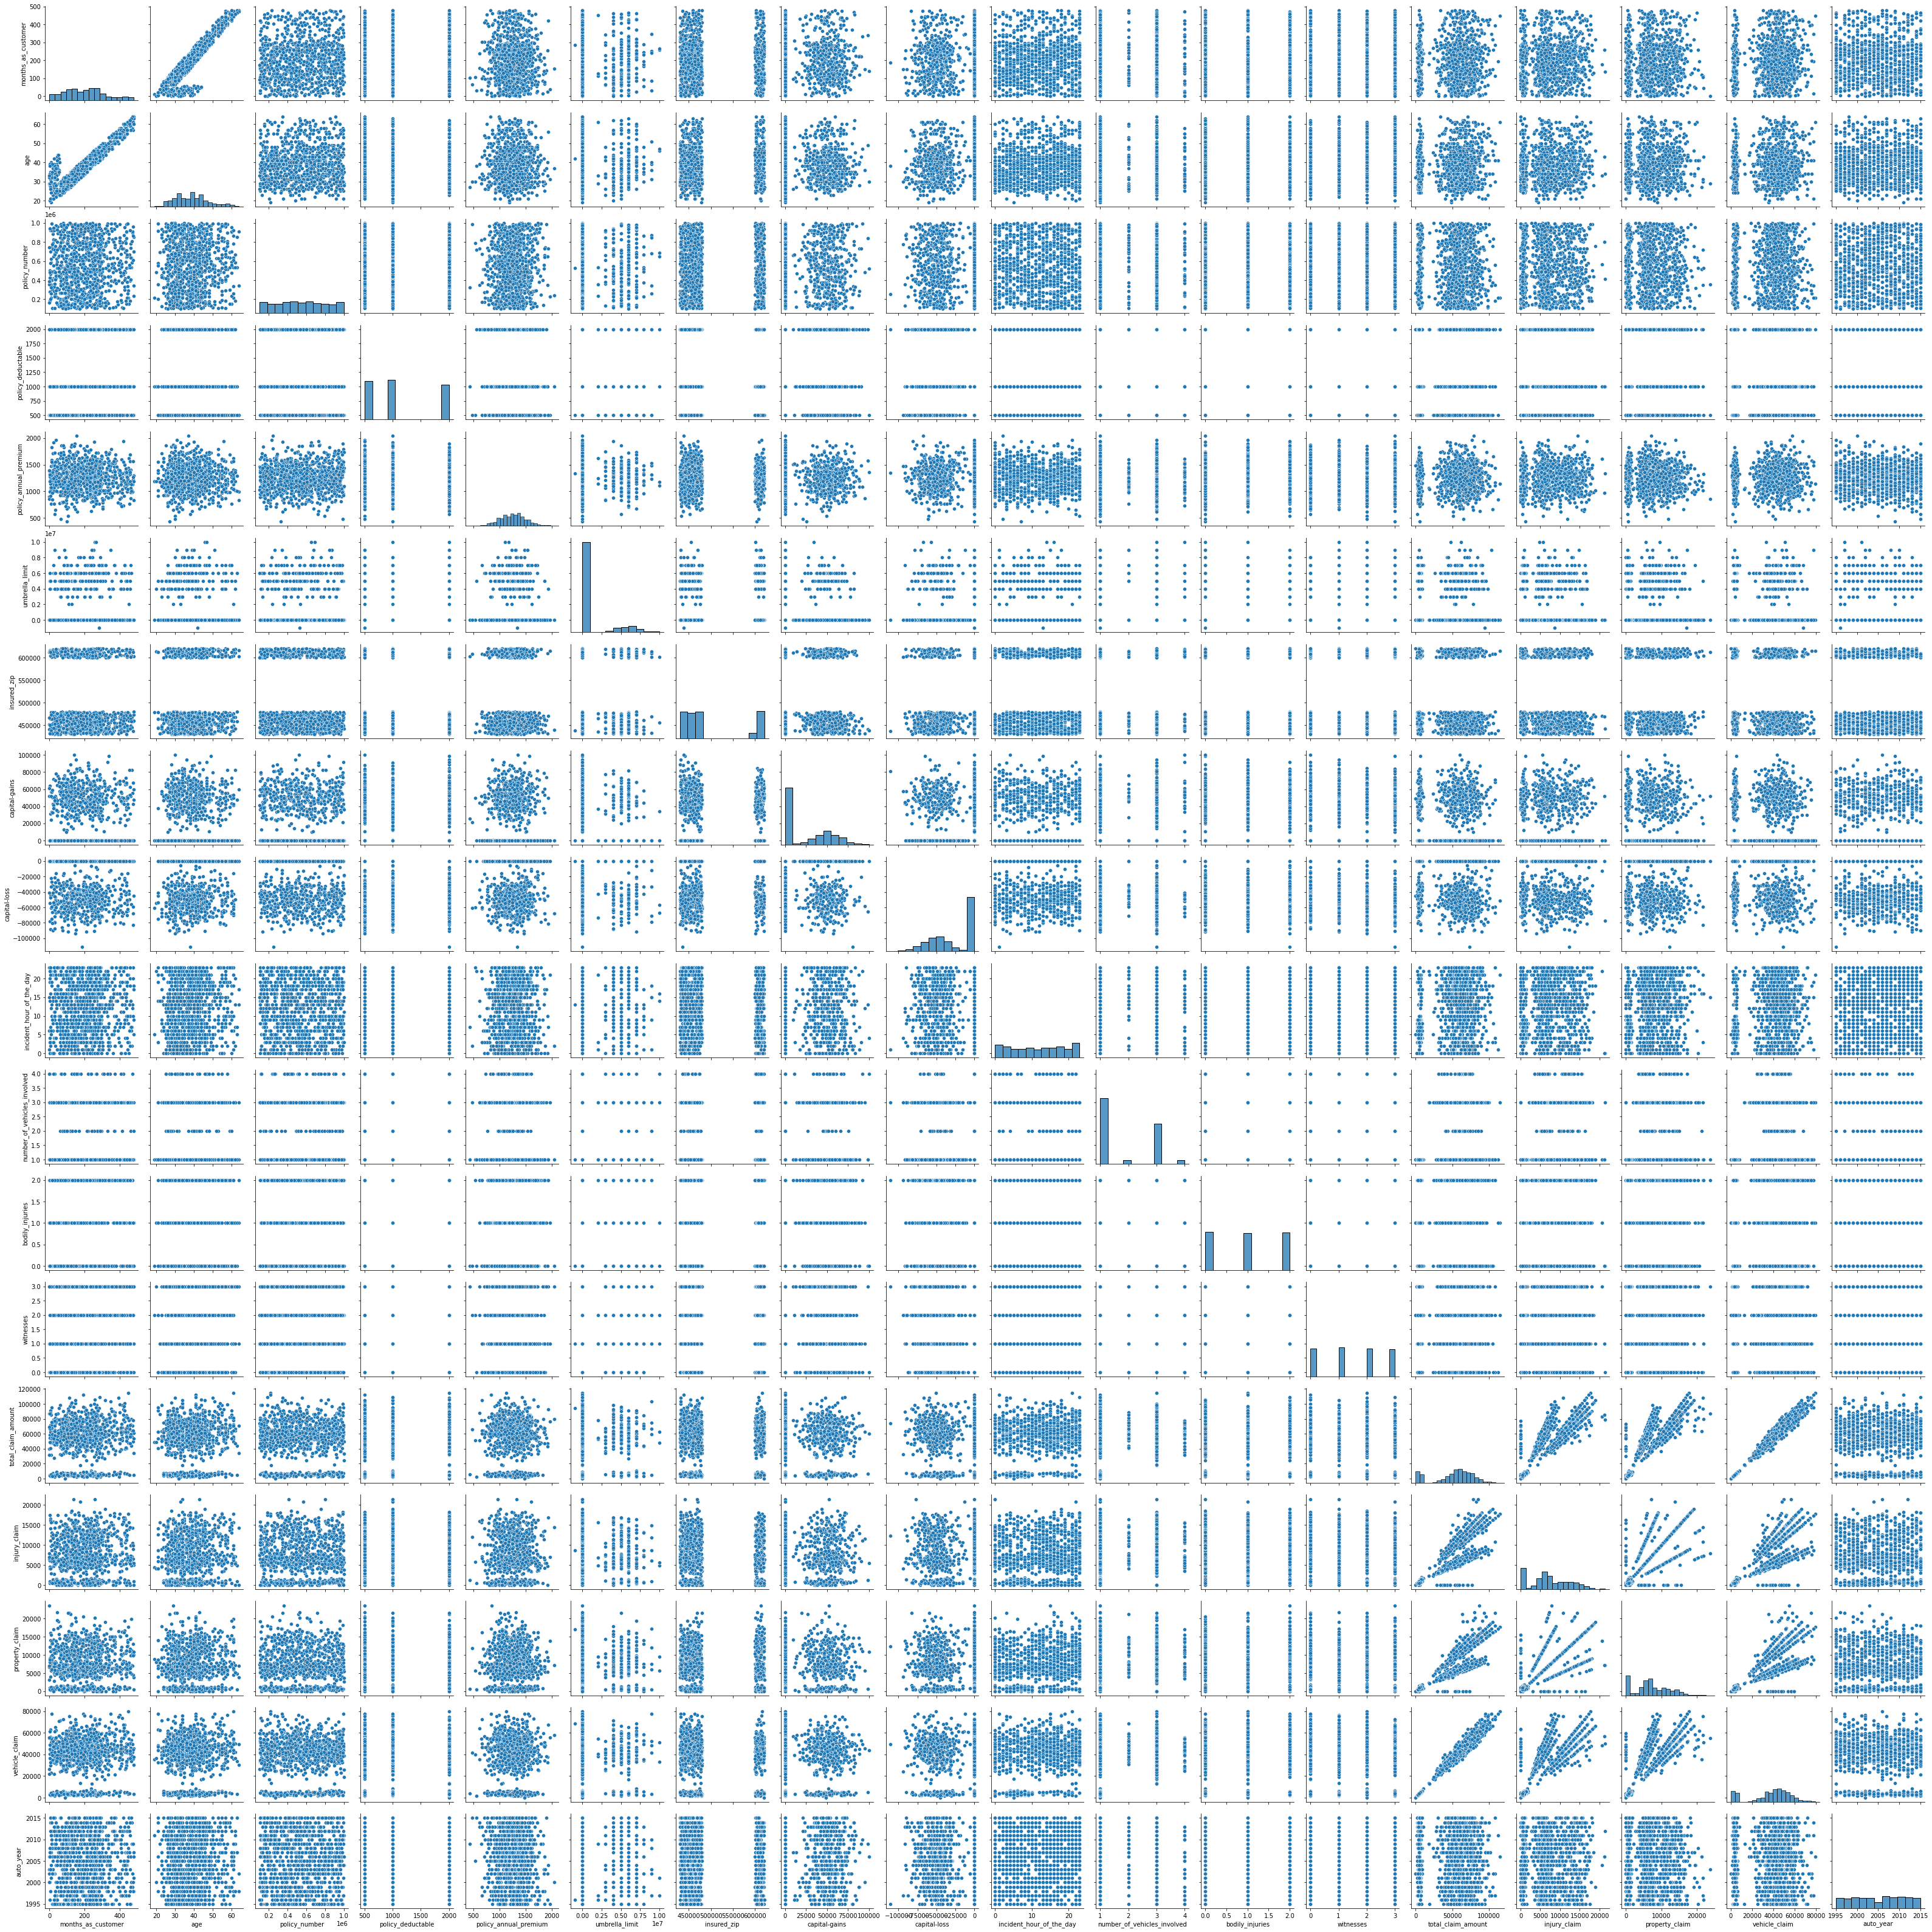

In [134]:
sns.pairplot(data)

In [135]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64

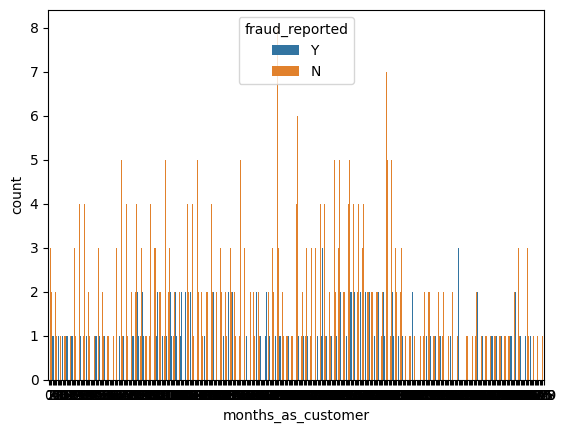

In [136]:
sns.countplot(data["months_as_customer"] , hue = "fraud_reported" , data = data)
data["months_as_customer"].value_counts()

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64

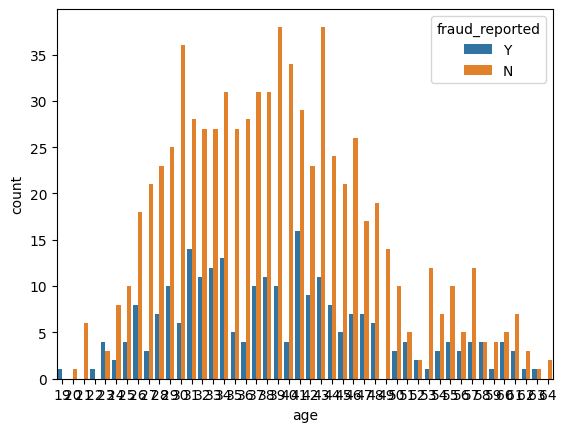

In [137]:
sns.countplot(data["age"] , hue = "fraud_reported" , data = data)
data["age"].value_counts()

521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64

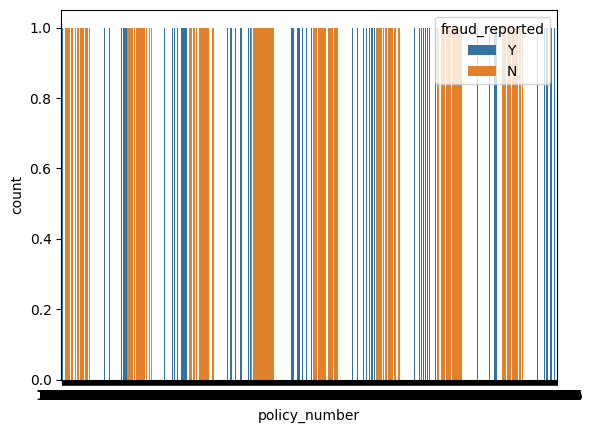

In [138]:
sns.countplot(data["policy_number"] , hue = "fraud_reported" , data = data)
data["policy_number"].value_counts()

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

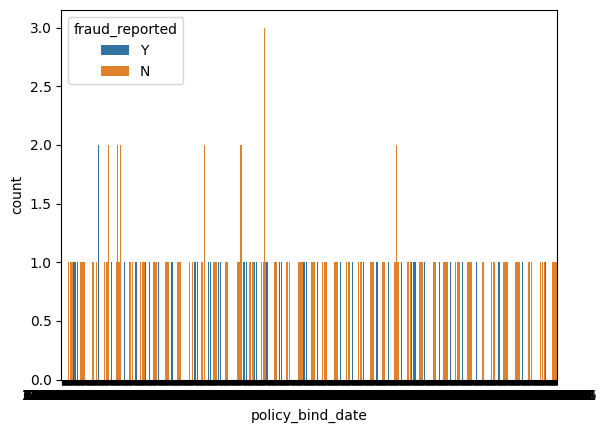

In [139]:
sns.countplot(data["policy_bind_date"] , hue = "fraud_reported" , data = data)
data["policy_bind_date"].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

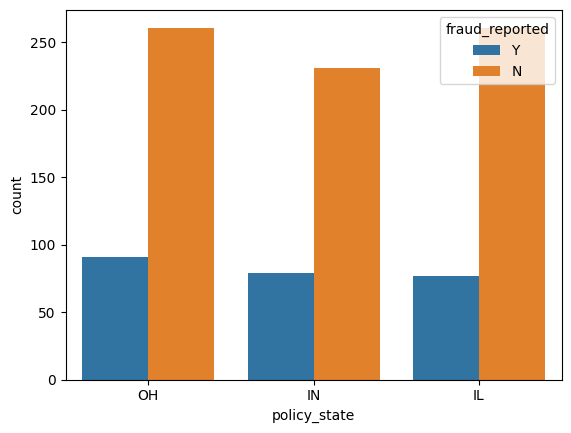

In [140]:
sns.countplot(data["policy_state"] , hue = "fraud_reported" , data = data)
data["policy_state"].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

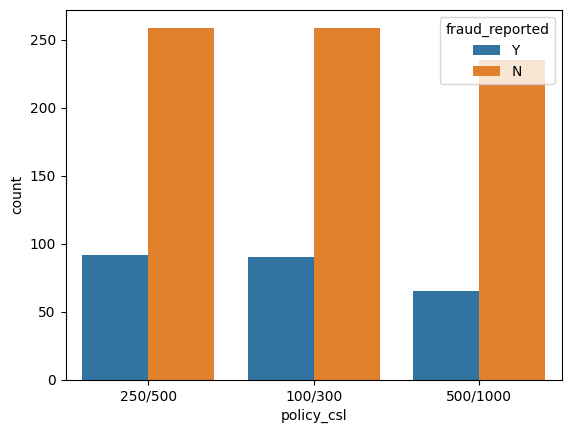

In [141]:
sns.countplot(data["policy_csl"] , hue = "fraud_reported" , data = data)
data["policy_csl"].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

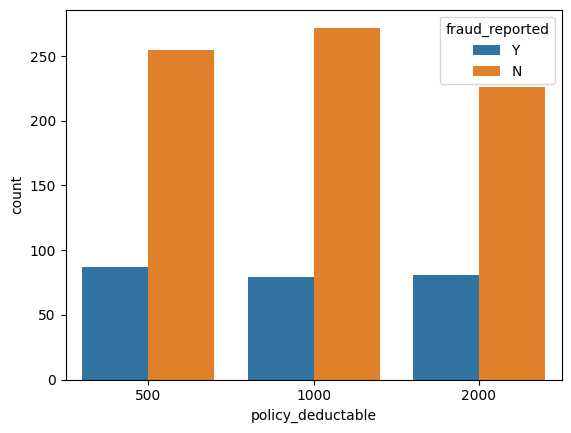

In [142]:
sns.countplot(data["policy_deductable"] , hue = "fraud_reported" , data = data)
data["policy_deductable"].value_counts()

1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64

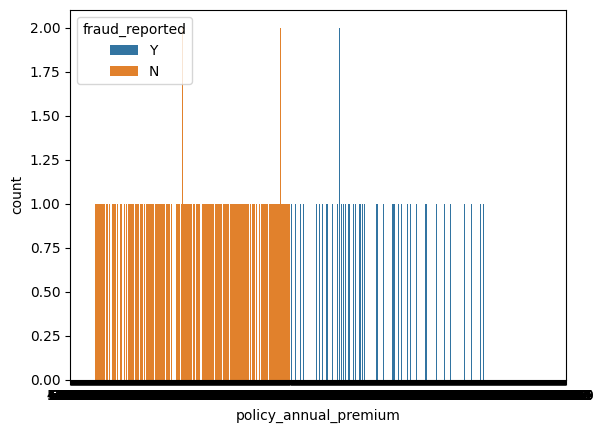

In [143]:
sns.countplot(data["policy_annual_premium"] , hue = "fraud_reported" , data = data)
data["policy_annual_premium"].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

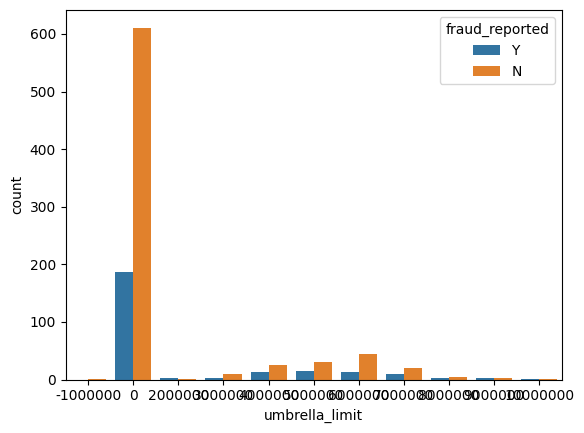

In [144]:
sns.countplot(data["umbrella_limit"] , hue = "fraud_reported" , data = data)
data["umbrella_limit"].value_counts()

477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64

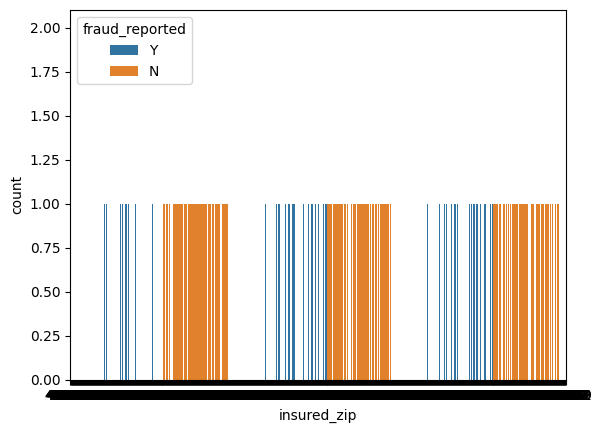

In [145]:
sns.countplot(data["insured_zip"] , hue = "fraud_reported" , data = data)
data["insured_zip"].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

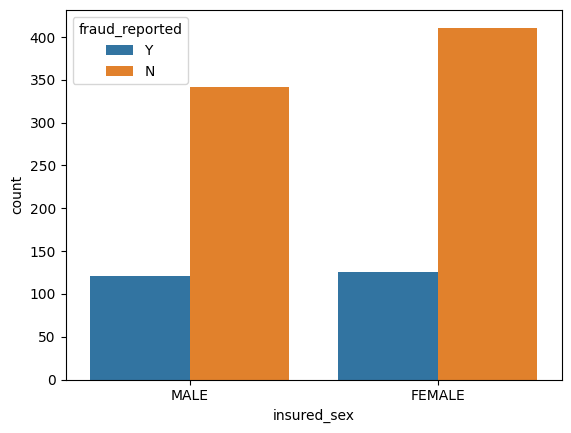

In [146]:
sns.countplot(data["insured_sex"] , hue = "fraud_reported" , data = data)
data["insured_sex"].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

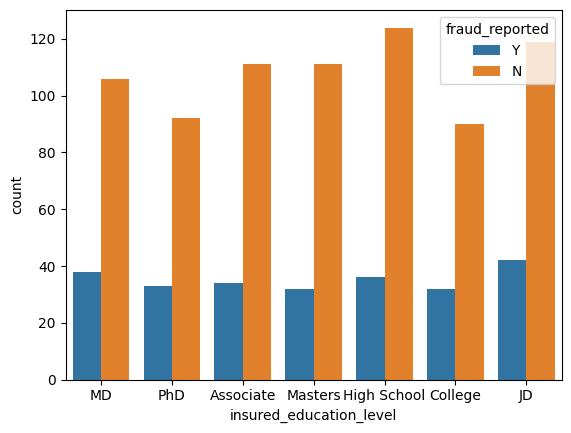

In [147]:
sns.countplot(data["insured_education_level"] , hue = "fraud_reported" , data = data)
data["insured_education_level"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

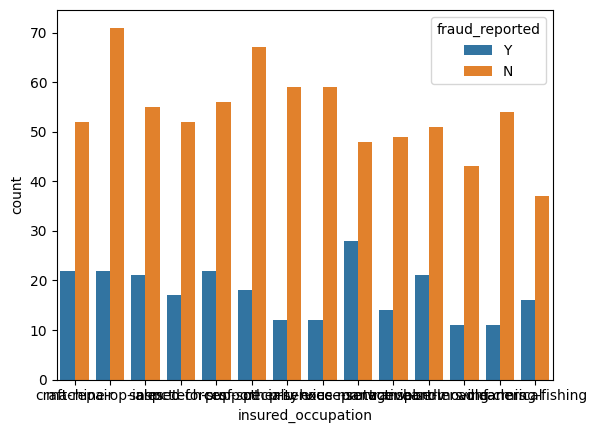

In [148]:
sns.countplot(data["insured_occupation"] , hue = "fraud_reported" , data = data)
data["insured_occupation"].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

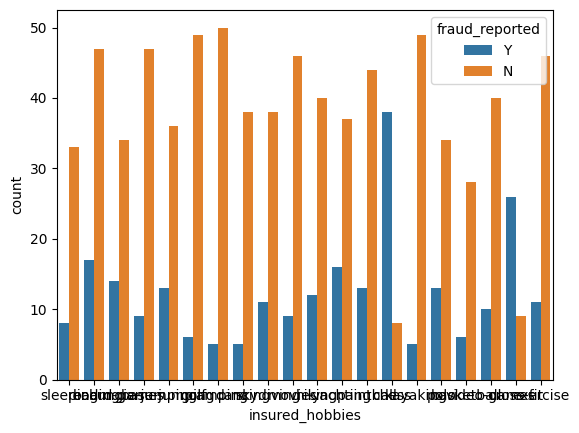

In [149]:
sns.countplot(data["insured_hobbies"] , hue = "fraud_reported" , data = data)
data["insured_hobbies"].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

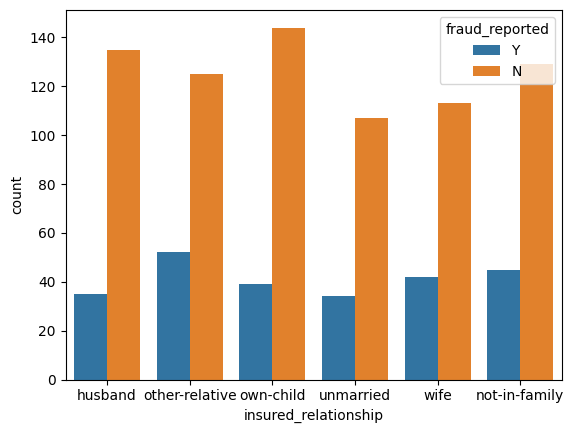

In [150]:
sns.countplot(data["insured_relationship"] , hue = "fraud_reported" , data = data)
data["insured_relationship"].value_counts()

0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64

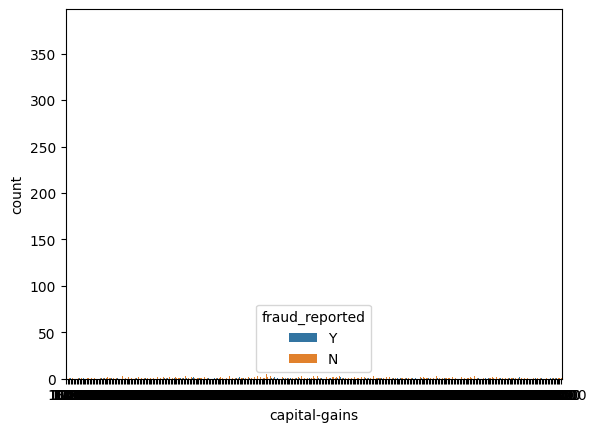

In [151]:
sns.countplot(data["capital-gains"] , hue = "fraud_reported" , data = data)
data["capital-gains"].value_counts()

 0        475
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64

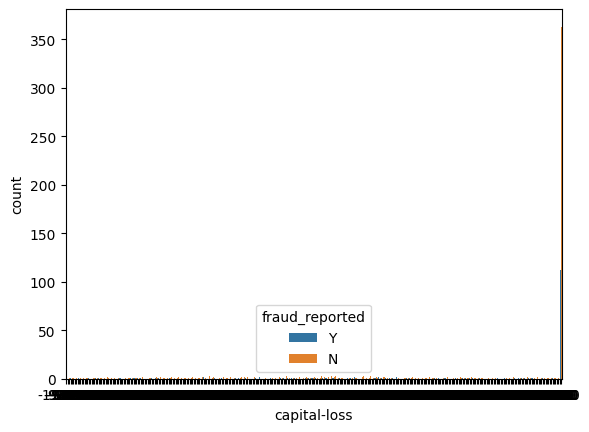

In [152]:
sns.countplot(data["capital-loss"] , hue = "fraud_reported" , data = data)
data["capital-loss"].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

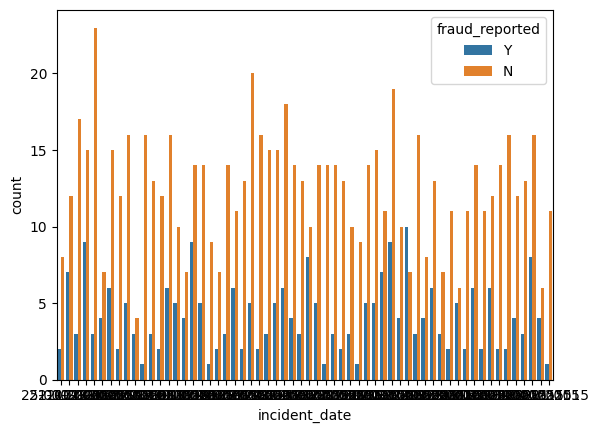

In [153]:
sns.countplot(data["incident_date"] , hue = "fraud_reported" , data = data)
data["incident_date"].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

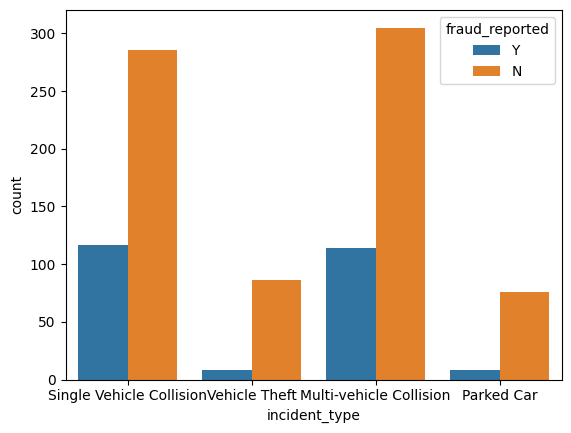

In [154]:
sns.countplot(data["incident_type"] , hue = "fraud_reported" , data = data)
data["incident_type"].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

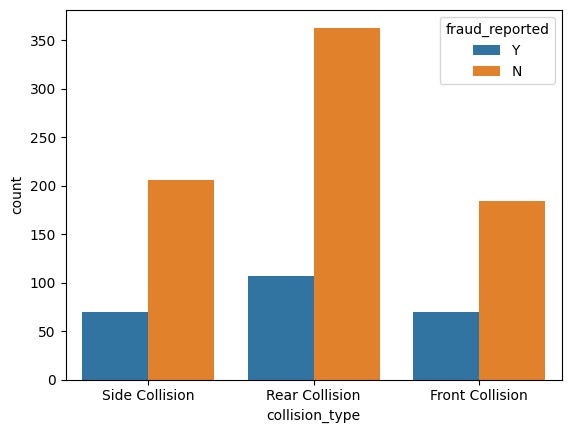

In [155]:
sns.countplot(data["collision_type"] , hue = "fraud_reported" , data = data)
data["collision_type"].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

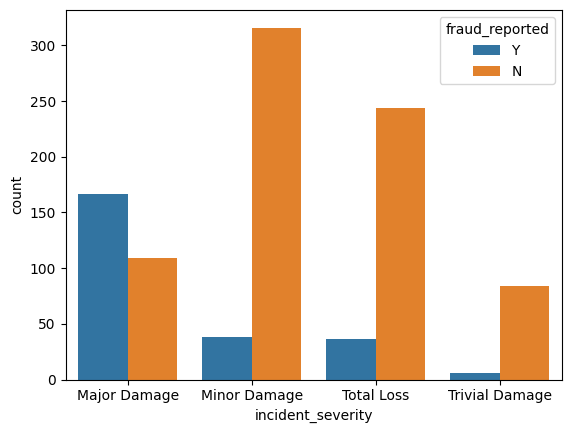

In [156]:
sns.countplot(data["incident_severity"] , hue = "fraud_reported" , data = data)
data["incident_severity"].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

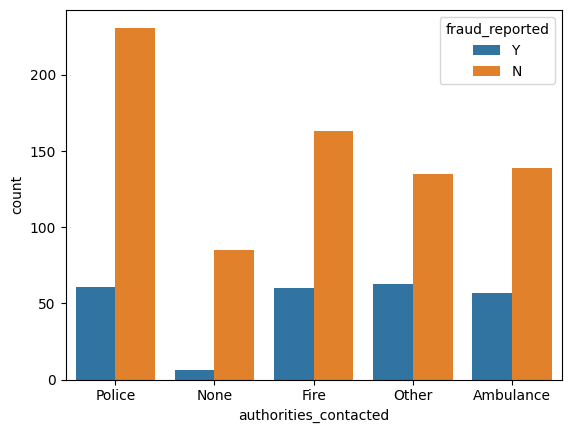

In [157]:
sns.countplot(data["authorities_contacted"] , hue = "fraud_reported" , data = data)
data["authorities_contacted"].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

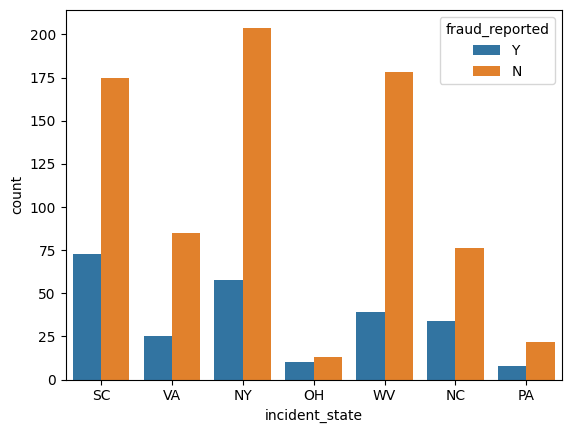

In [158]:
sns.countplot(data["incident_state"] , hue = "fraud_reported" , data = data)
data["incident_state"].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

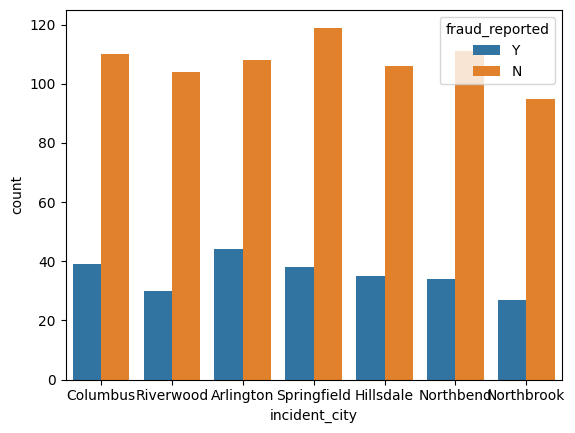

In [159]:
sns.countplot(data["incident_city"] , hue = "fraud_reported" , data = data)
data["incident_city"].value_counts()

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

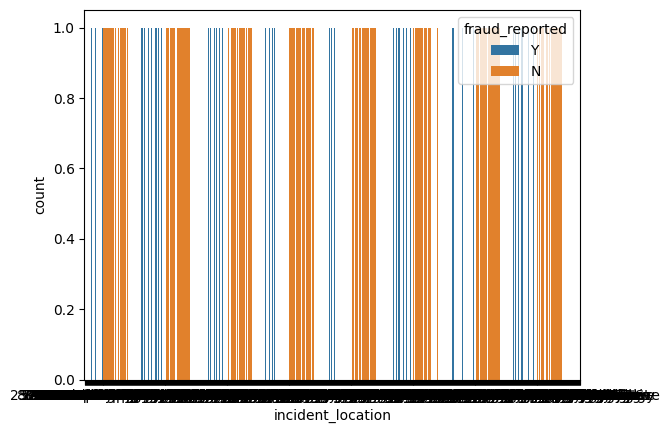

In [160]:
sns.countplot(data["incident_location"] , hue = "fraud_reported" , data = data)
data["incident_location"].value_counts()

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

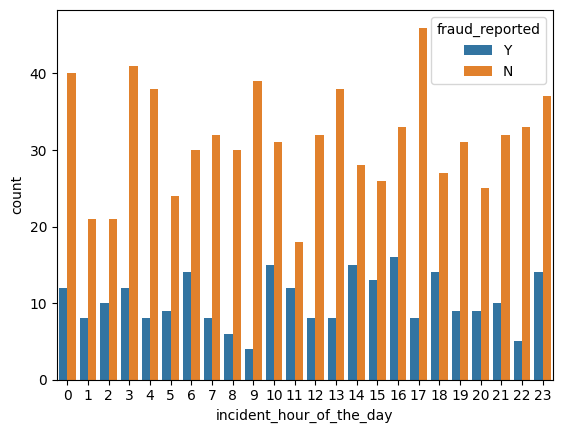

In [161]:
sns.countplot(data["incident_hour_of_the_day"] , hue = "fraud_reported" , data = data)
data["incident_hour_of_the_day"].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

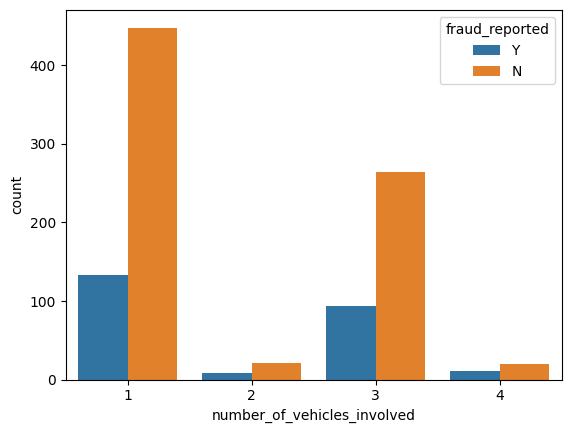

In [162]:
sns.countplot(data["number_of_vehicles_involved"] , hue = "fraud_reported" , data = data)
data["number_of_vehicles_involved"].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

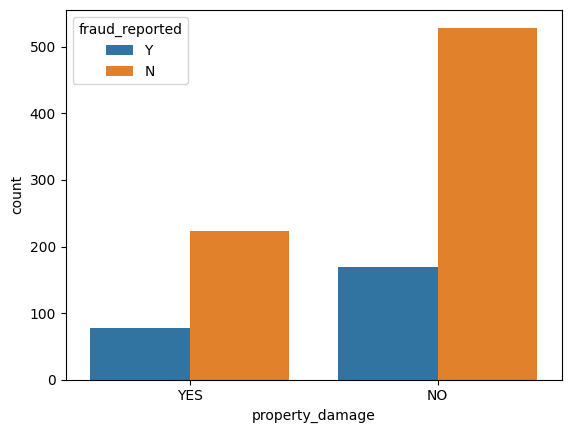

In [163]:
sns.countplot(data["property_damage"] , hue = "fraud_reported" , data = data)
data["property_damage"].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

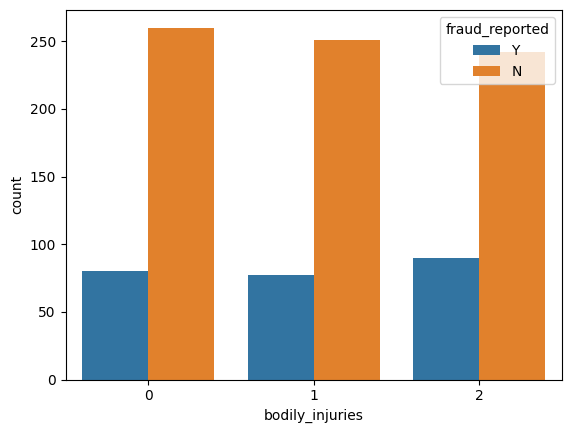

In [164]:
sns.countplot(data["bodily_injuries"] , hue = "fraud_reported" , data = data)
data["bodily_injuries"].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

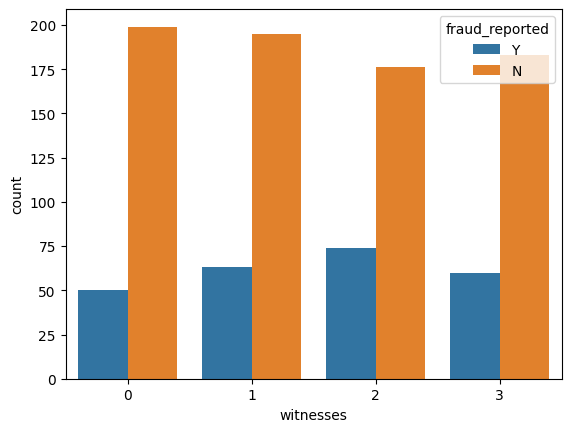

In [165]:
sns.countplot(data["witnesses"] , hue = "fraud_reported" , data = data)
data["witnesses"].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

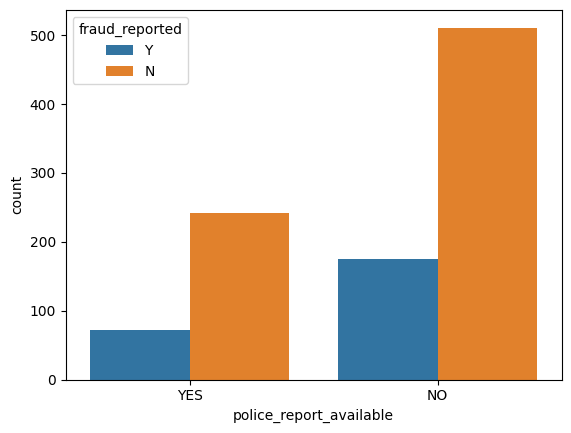

In [166]:
sns.countplot(data["police_report_available"] , hue = "fraud_reported" , data = data)
data["police_report_available"].value_counts()

59400    5
2640     4
70400    4
4320     4
44200    4
        ..
65250    1
87100    1
6240     1
66600    1
67500    1
Name: total_claim_amount, Length: 763, dtype: int64

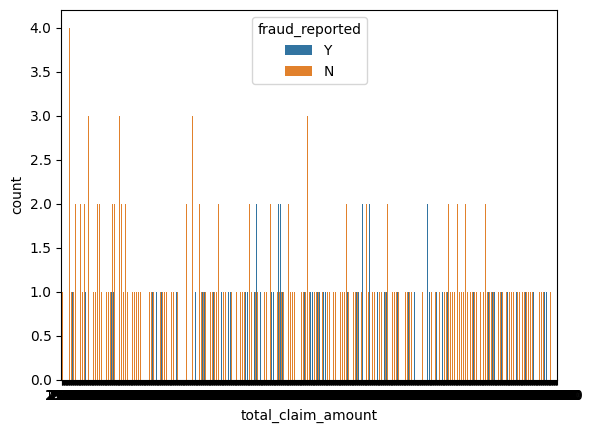

In [167]:
sns.countplot(data["total_claim_amount"] , hue = "fraud_reported" , data = data)
data["total_claim_amount"].value_counts()

0        25
640       7
480       7
660       5
580       5
         ..
14840     1
6580      1
11820     1
16650     1
7500      1
Name: injury_claim, Length: 638, dtype: int64

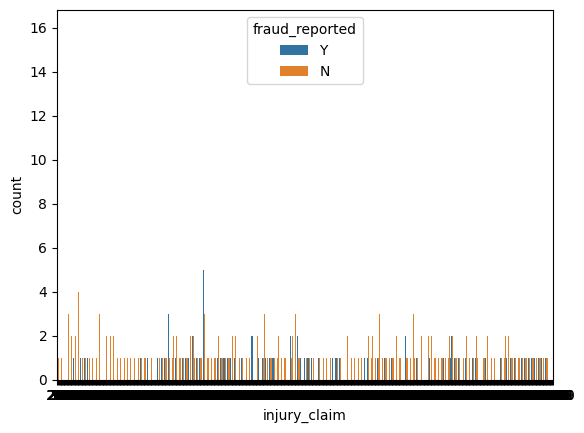

In [168]:
sns.countplot(data["injury_claim"] , hue = "fraud_reported" , data = data)
data["injury_claim"].value_counts()

0        19
860       6
480       5
660       5
10000     5
         ..
3590      1
6480      1
4580      1
4920      1
7500      1
Name: property_claim, Length: 626, dtype: int64

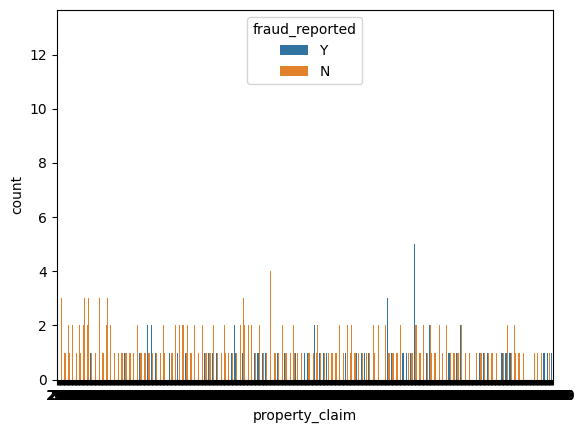

In [169]:
sns.countplot(data["property_claim"] , hue = "fraud_reported" , data = data)
data["property_claim"].value_counts()

5040     7
3360     6
52080    5
4720     5
3600     5
        ..
43360    1
25130    1
38940    1
47430    1
52500    1
Name: vehicle_claim, Length: 726, dtype: int64

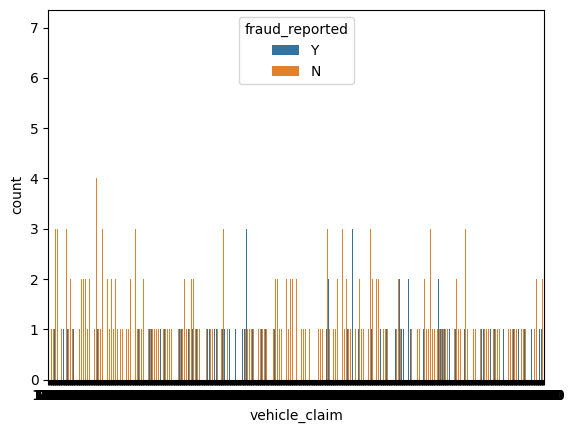

In [170]:
sns.countplot(data["vehicle_claim"] , hue = "fraud_reported" , data = data)
data["vehicle_claim"].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

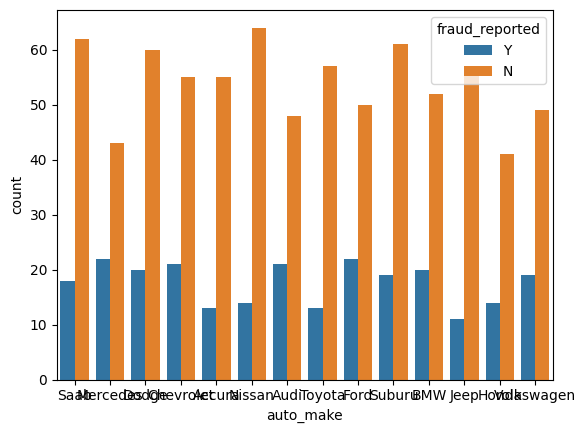

In [171]:
sns.countplot(data["auto_make"] , hue = "fraud_reported" , data = data)
data["auto_make"].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

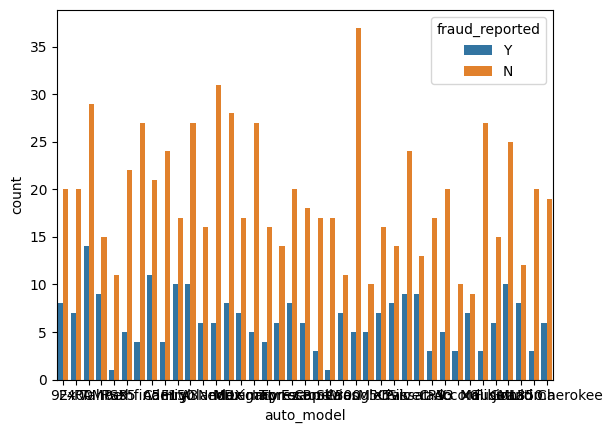

In [172]:
sns.countplot(data["auto_model"] , hue = "fraud_reported" , data = data)
data["auto_model"].value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

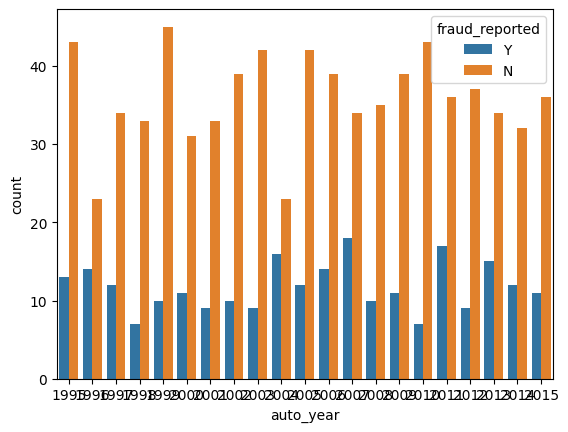

In [173]:
sns.countplot(data["auto_year"] , hue = "fraud_reported" , data = data)
data["auto_year"].value_counts()

<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

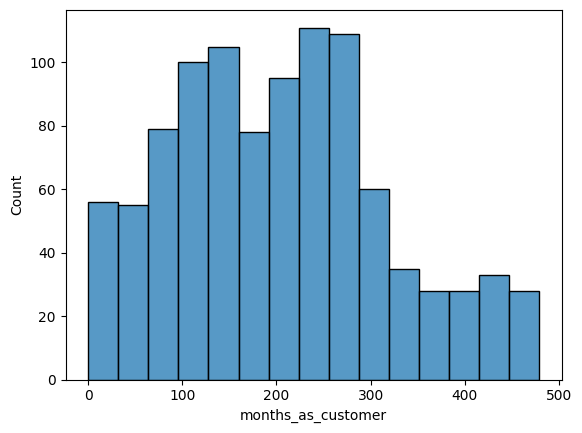

In [174]:
sns.histplot(data["months_as_customer"])

<AxesSubplot:xlabel='age', ylabel='Count'>

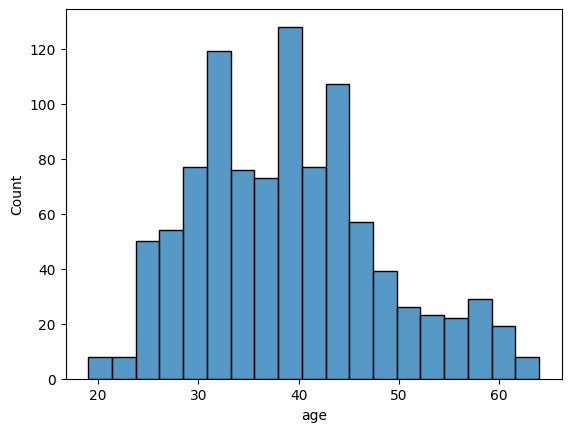

In [175]:
sns.histplot(data["age"])

<AxesSubplot:xlabel='policy_number', ylabel='Count'>

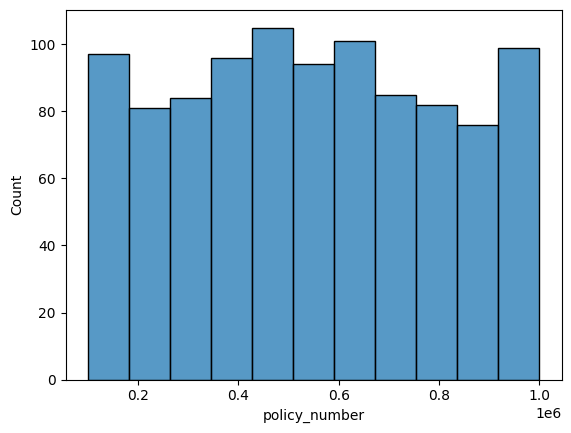

In [176]:
sns.histplot(data["policy_number"])

<AxesSubplot:xlabel='policy_bind_date', ylabel='Count'>

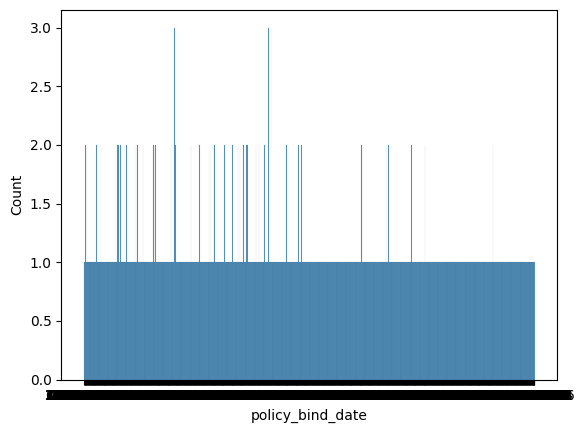

In [177]:
sns.histplot(data["policy_bind_date"])

<AxesSubplot:xlabel='policy_state', ylabel='Count'>

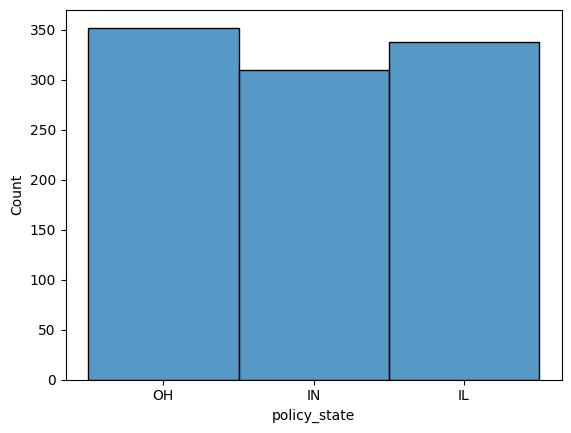

In [178]:
sns.histplot(data["policy_state"])

<AxesSubplot:xlabel='policy_csl', ylabel='Count'>

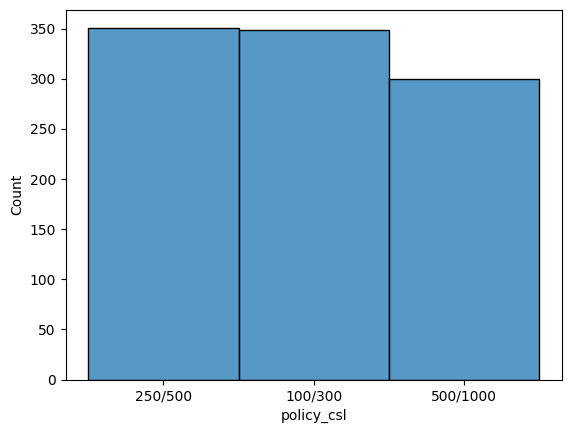

In [179]:
sns.histplot(data["policy_csl"])

<AxesSubplot:xlabel='policy_deductable', ylabel='Count'>

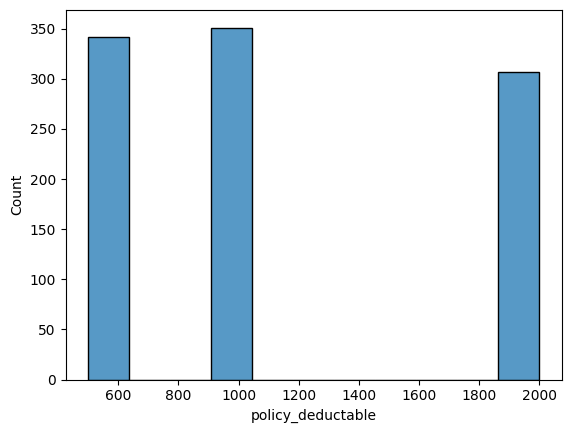

In [180]:
sns.histplot(data["policy_deductable"])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

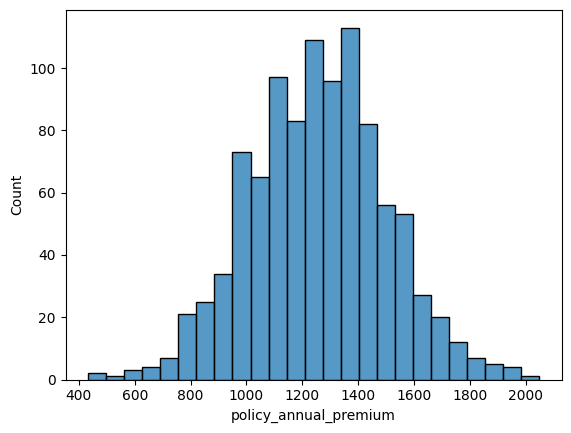

In [181]:
sns.histplot(data["policy_annual_premium"])

<AxesSubplot:xlabel='umbrella_limit', ylabel='Count'>

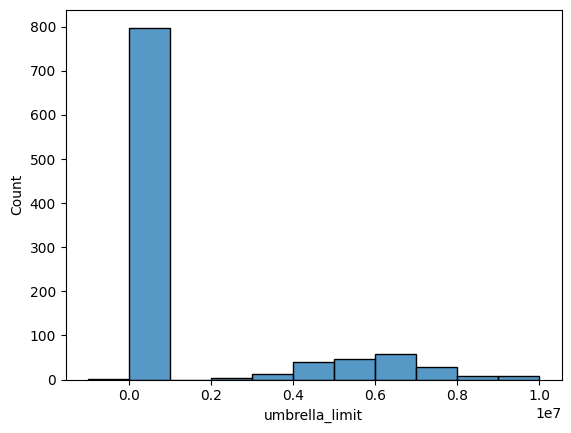

In [182]:
sns.histplot(data["umbrella_limit"])

<AxesSubplot:xlabel='insured_zip', ylabel='Count'>

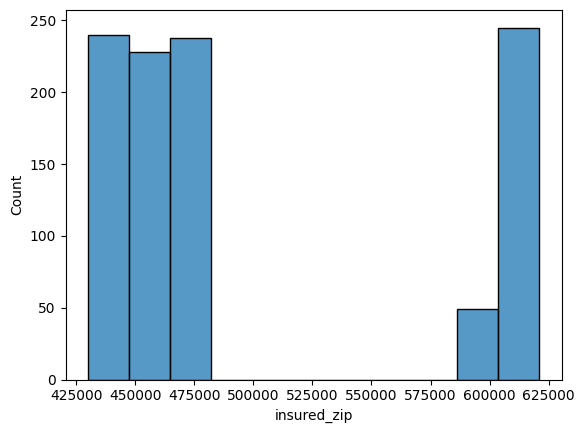

In [183]:
sns.histplot(data["insured_zip"])

<AxesSubplot:xlabel='insured_sex', ylabel='Count'>

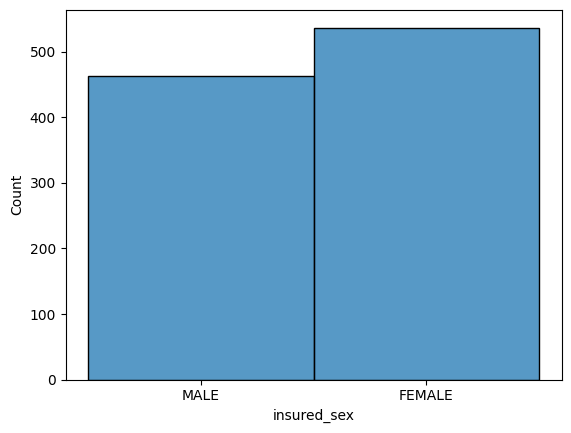

In [184]:
sns.histplot(data["insured_sex"])

<AxesSubplot:xlabel='insured_education_level', ylabel='Count'>

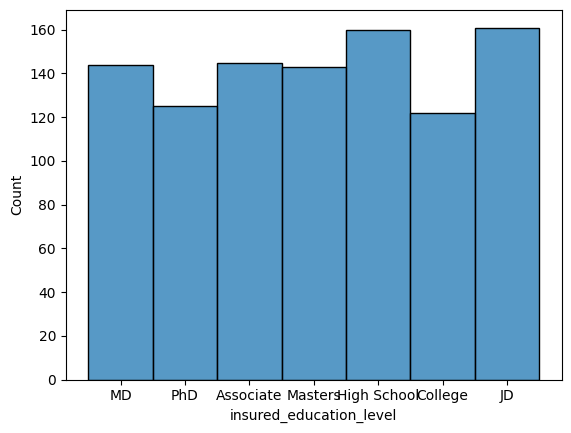

In [185]:
sns.histplot(data["insured_education_level"])

<AxesSubplot:xlabel='insured_occupation', ylabel='Count'>

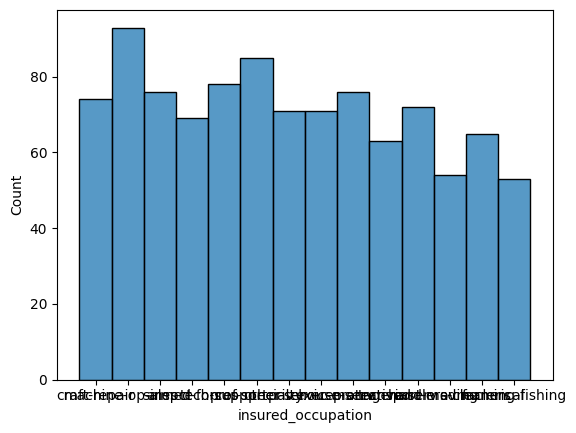

In [186]:
sns.histplot(data["insured_occupation"])

<AxesSubplot:xlabel='insured_hobbies', ylabel='Count'>

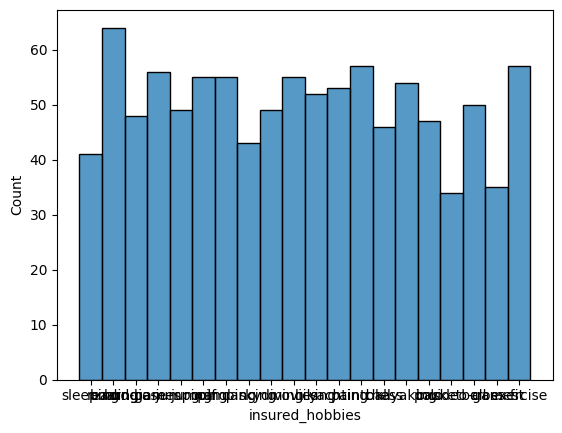

In [187]:
sns.histplot(data["insured_hobbies"])

<AxesSubplot:xlabel='insured_relationship', ylabel='Count'>

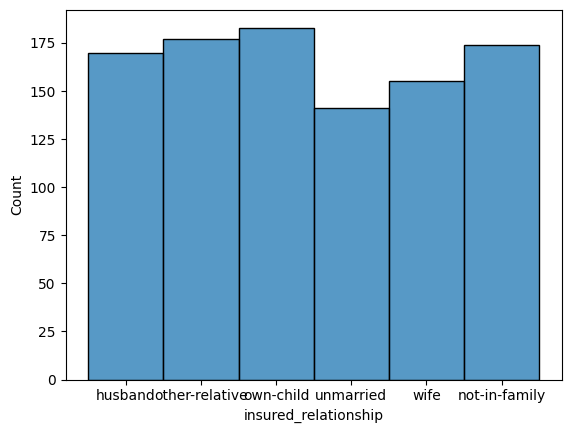

In [188]:
sns.histplot(data["insured_relationship"])

<AxesSubplot:xlabel='capital-gains', ylabel='Count'>

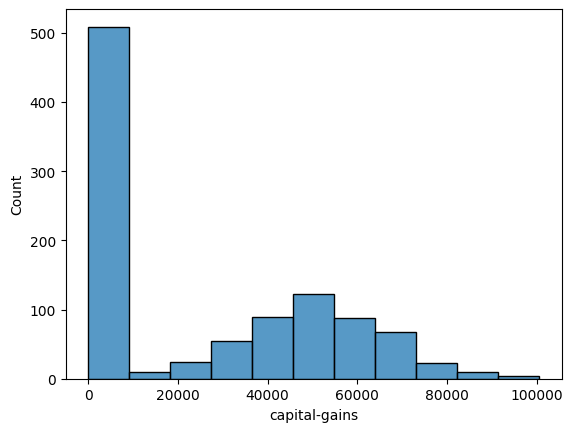

In [189]:
sns.histplot(data["capital-gains"])

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

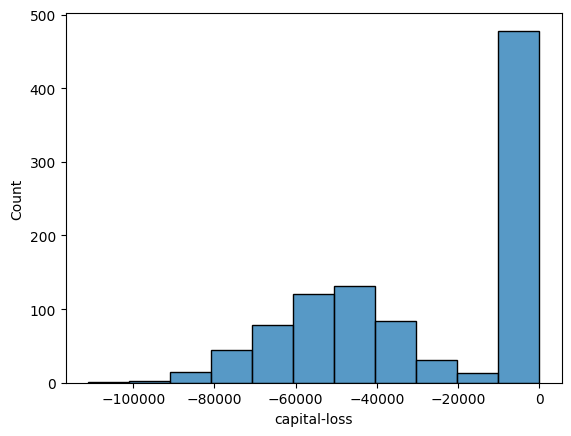

In [190]:
sns.histplot(data["capital-loss"])

<AxesSubplot:xlabel='incident_date', ylabel='Count'>

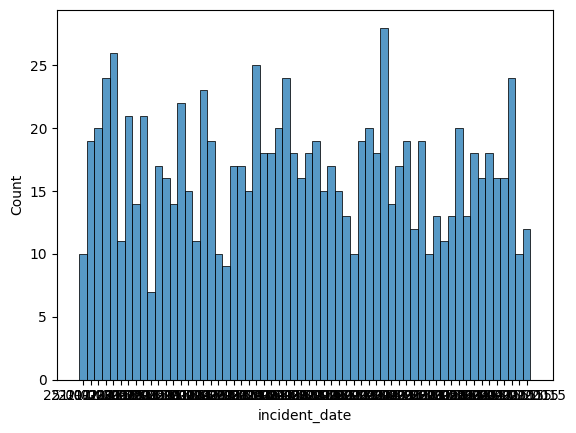

In [191]:
sns.histplot(data["incident_date"])

<AxesSubplot:xlabel='incident_type', ylabel='Count'>

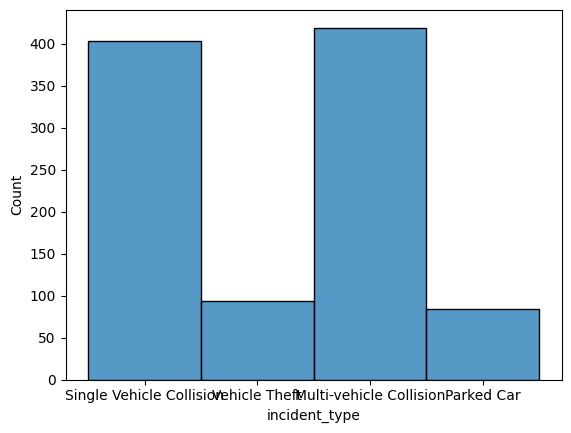

In [192]:
sns.histplot(data["incident_type"])

<AxesSubplot:xlabel='collision_type', ylabel='Count'>

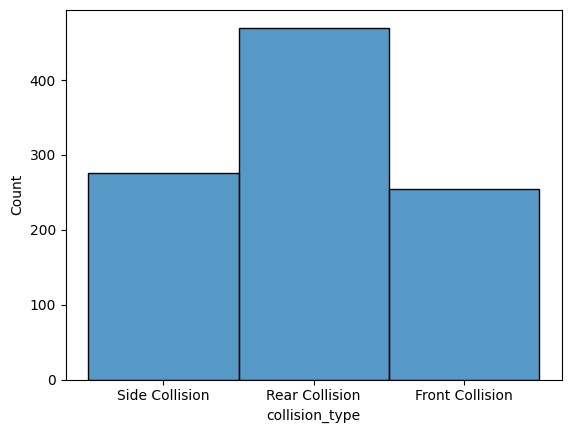

In [193]:
sns.histplot(data["collision_type"])

<AxesSubplot:xlabel='incident_severity', ylabel='Count'>

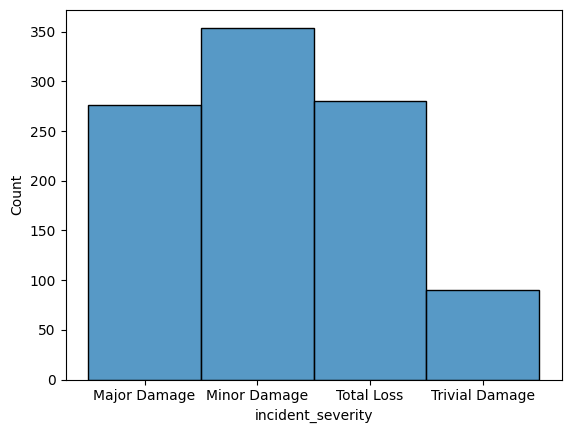

In [194]:
sns.histplot(data["incident_severity"])

<AxesSubplot:xlabel='authorities_contacted', ylabel='Count'>

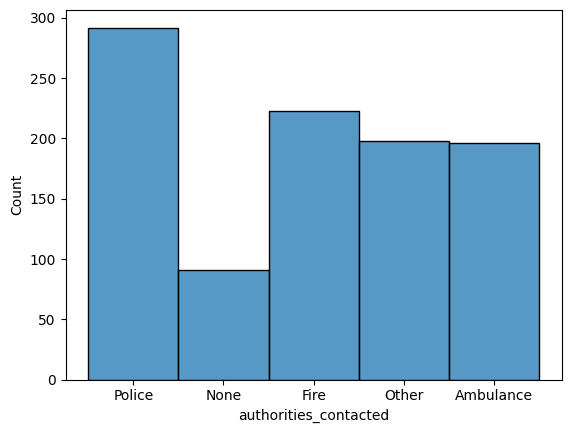

In [195]:
sns.histplot(data["authorities_contacted"])

<AxesSubplot:xlabel='incident_state', ylabel='Count'>

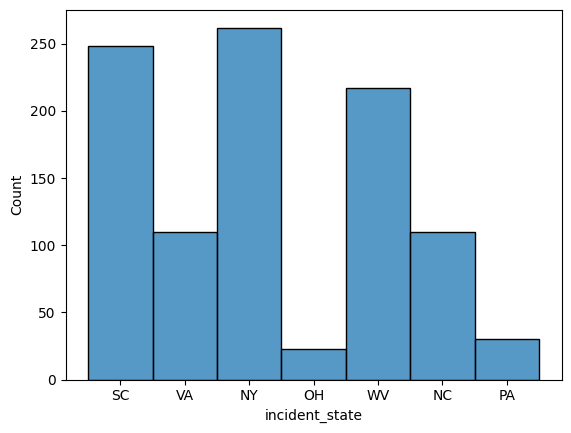

In [196]:
sns.histplot(data["incident_state"])

<AxesSubplot:xlabel='incident_city', ylabel='Count'>

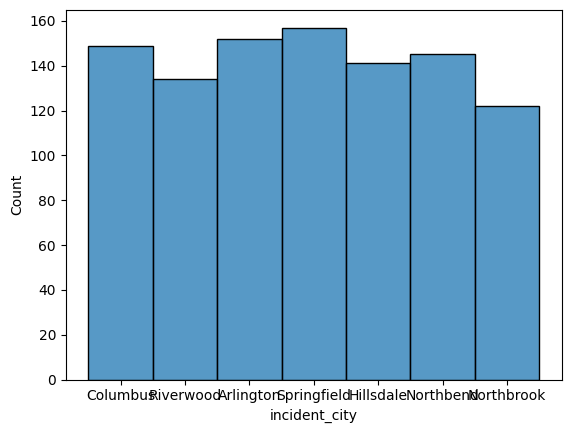

In [197]:
sns.histplot(data["incident_city"])

<AxesSubplot:xlabel='incident_location', ylabel='Count'>

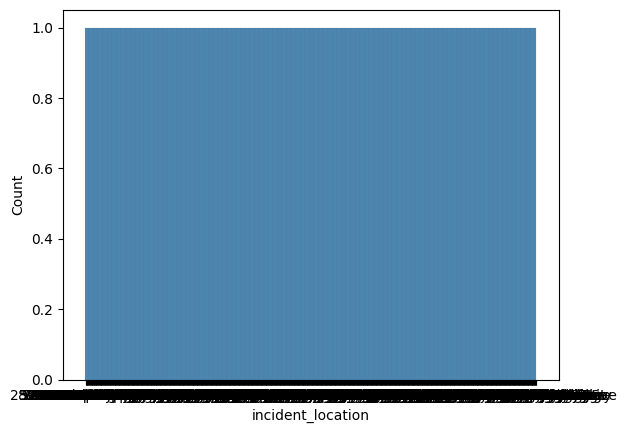

In [198]:
sns.histplot(data["incident_location"])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Count'>

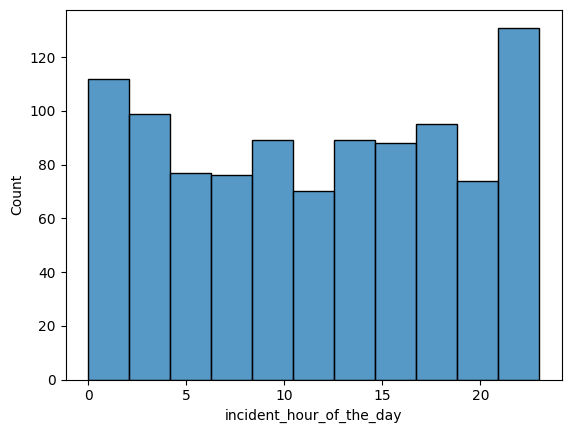

In [199]:
sns.histplot(data["incident_hour_of_the_day"])

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Count'>

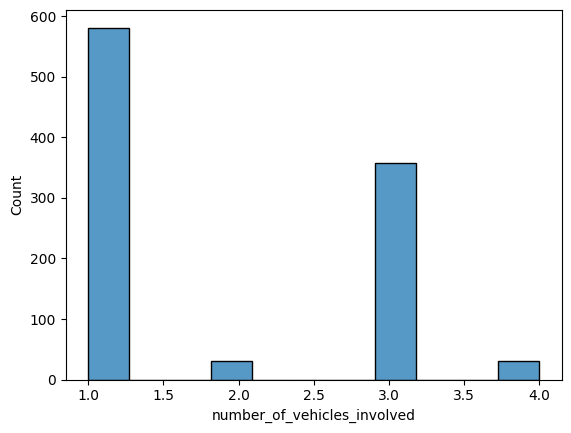

In [200]:
sns.histplot(data["number_of_vehicles_involved"])

<AxesSubplot:xlabel='property_damage', ylabel='Count'>

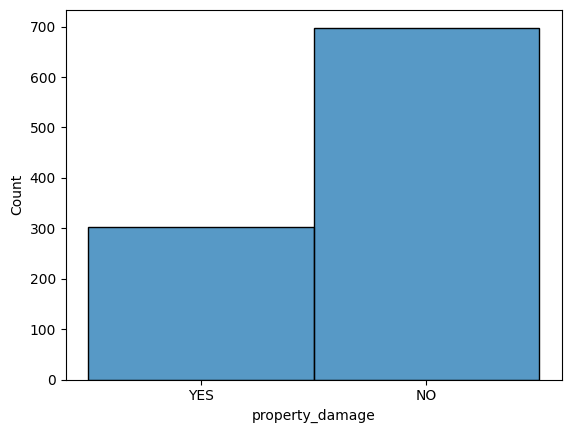

In [201]:
sns.histplot(data["property_damage"])

<AxesSubplot:xlabel='bodily_injuries', ylabel='Count'>

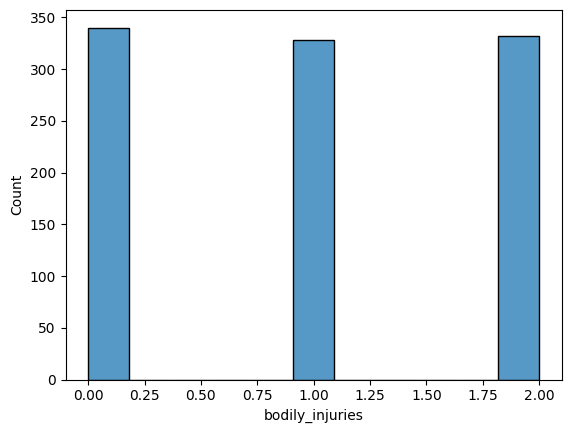

In [202]:
sns.histplot(data["bodily_injuries"])

<AxesSubplot:xlabel='witnesses', ylabel='Count'>

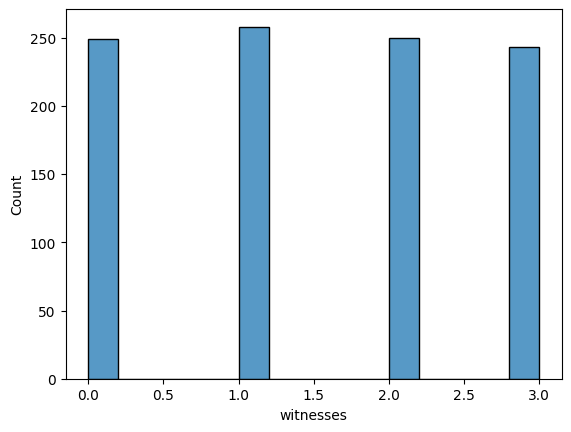

In [203]:
sns.histplot(data["witnesses"])

<AxesSubplot:xlabel='police_report_available', ylabel='Count'>

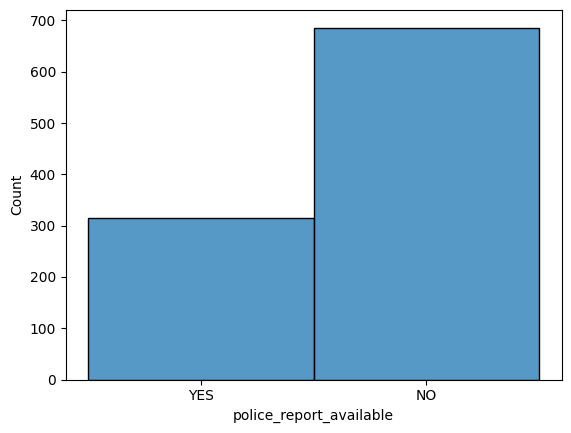

In [204]:
sns.histplot(data["police_report_available"])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

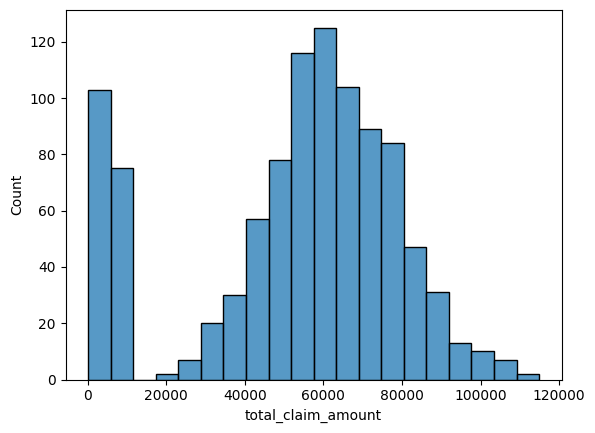

In [205]:
sns.histplot(data["total_claim_amount"])

<AxesSubplot:xlabel='injury_claim', ylabel='Count'>

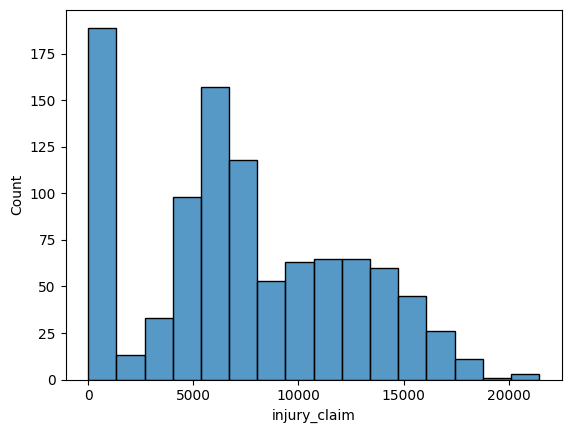

In [206]:
sns.histplot(data["injury_claim"])

<AxesSubplot:xlabel='property_claim', ylabel='Count'>

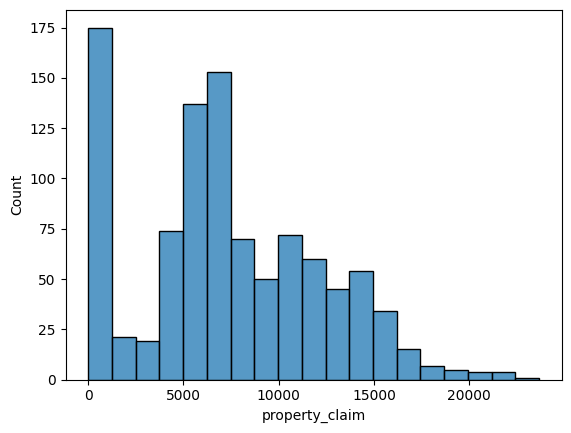

In [207]:
sns.histplot(data["property_claim"])

<AxesSubplot:xlabel='vehicle_claim', ylabel='Count'>

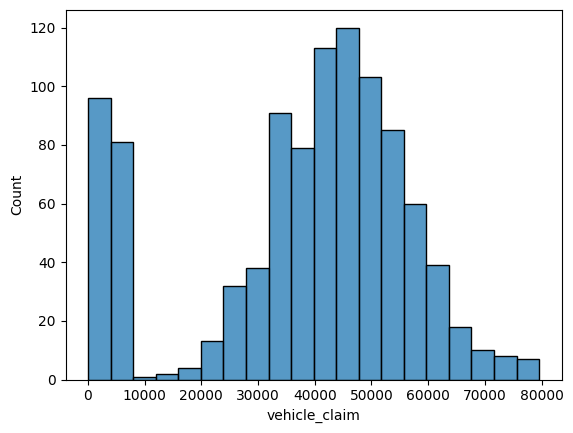

In [208]:
sns.histplot(data["vehicle_claim"])

<AxesSubplot:xlabel='auto_make', ylabel='Count'>

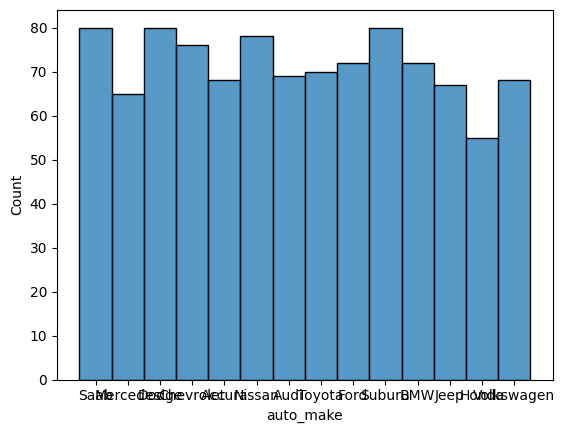

In [209]:
sns.histplot(data["auto_make"])

<AxesSubplot:xlabel='auto_model', ylabel='Count'>

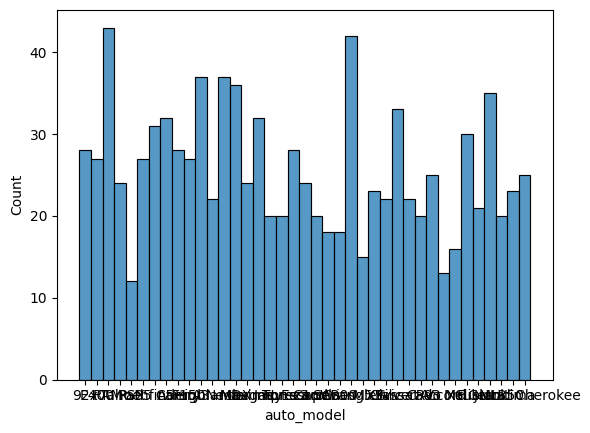

In [210]:
sns.histplot(data["auto_model"])

<AxesSubplot:xlabel='auto_year', ylabel='Count'>

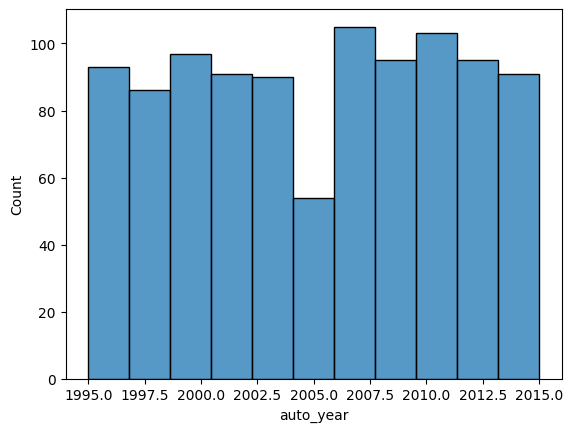

In [211]:
sns.histplot(data["auto_year"])

<AxesSubplot:xlabel='fraud_reported', ylabel='Count'>

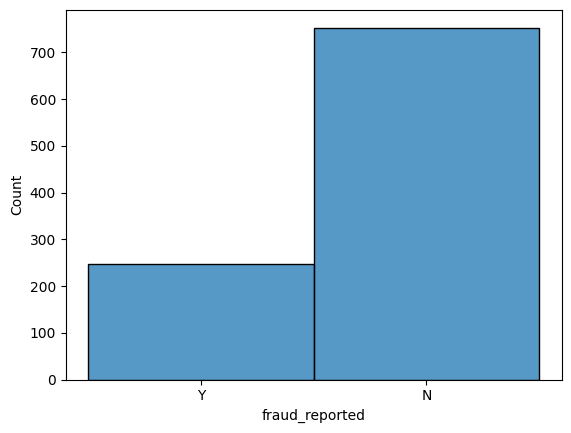

In [212]:
sns.histplot(data["fraud_reported"])

# Bivariate analysis

<AxesSubplot:xlabel='months_as_customer', ylabel='fraud_reported'>

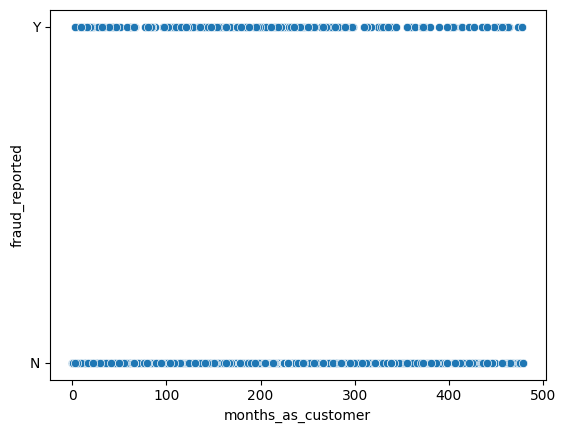

In [213]:
sns.scatterplot("months_as_customer", "fraud_reported", data=data)

<AxesSubplot:xlabel='age', ylabel='fraud_reported'>

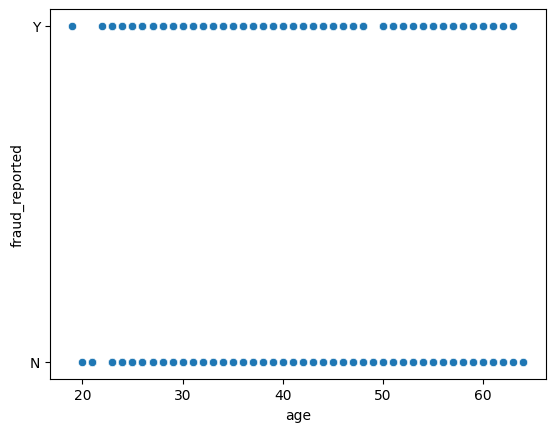

In [214]:
sns.scatterplot("age", "fraud_reported", data=data)

<AxesSubplot:xlabel='policy_number', ylabel='fraud_reported'>

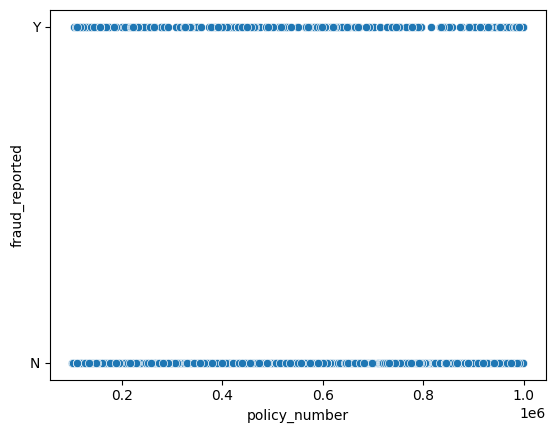

In [215]:
sns.scatterplot("policy_number", "fraud_reported", data=data)

<AxesSubplot:xlabel='policy_bind_date', ylabel='fraud_reported'>

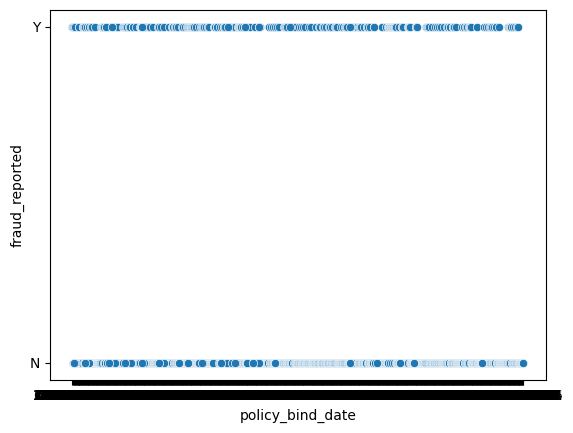

In [216]:
sns.scatterplot("policy_bind_date", "fraud_reported", data=data)

<AxesSubplot:xlabel='policy_state', ylabel='fraud_reported'>

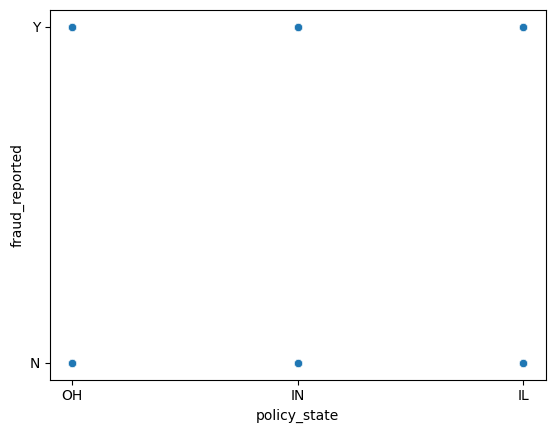

In [217]:
sns.scatterplot("policy_state", "fraud_reported", data=data)

<AxesSubplot:xlabel='policy_csl', ylabel='fraud_reported'>

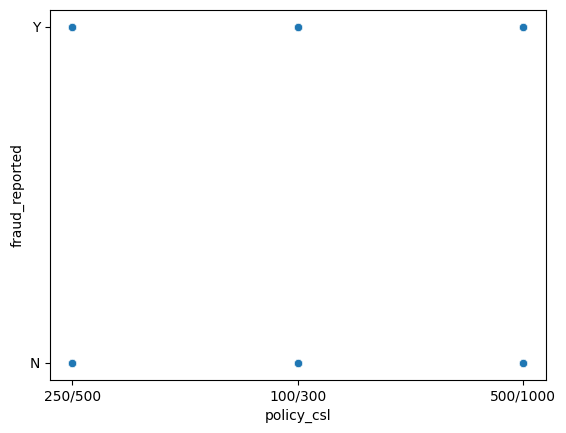

In [218]:
sns.scatterplot("policy_csl", "fraud_reported", data=data)

<AxesSubplot:xlabel='policy_deductable', ylabel='fraud_reported'>

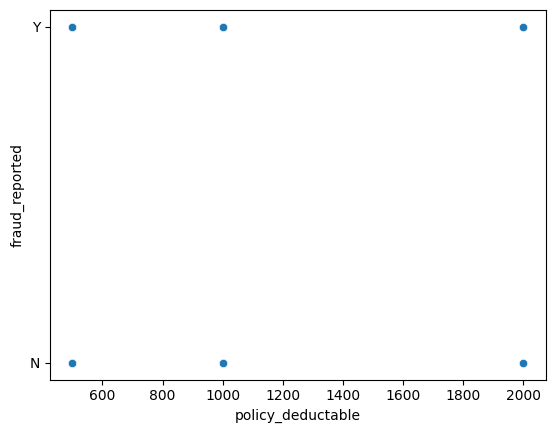

In [219]:
sns.scatterplot("policy_deductable", "fraud_reported", data=data)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='fraud_reported'>

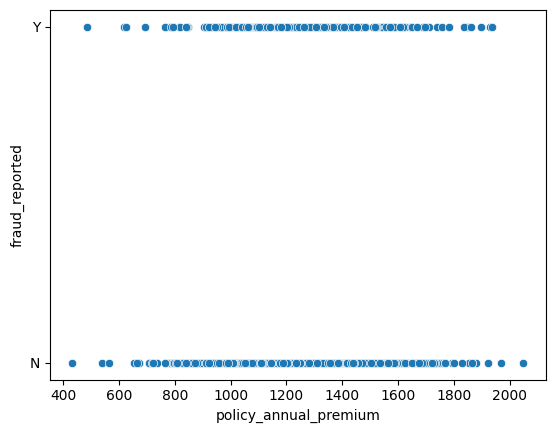

In [220]:
sns.scatterplot("policy_annual_premium", "fraud_reported", data=data)

<AxesSubplot:xlabel='umbrella_limit', ylabel='fraud_reported'>

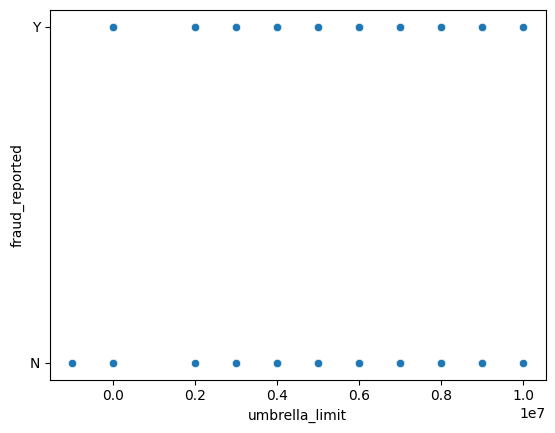

In [221]:
sns.scatterplot("umbrella_limit", "fraud_reported", data=data)

<AxesSubplot:xlabel='insured_zip', ylabel='fraud_reported'>

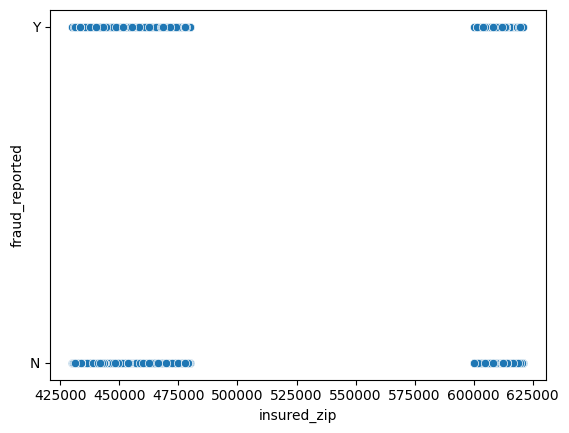

In [222]:
sns.scatterplot("insured_zip", "fraud_reported", data=data)

<AxesSubplot:xlabel='insured_sex', ylabel='fraud_reported'>

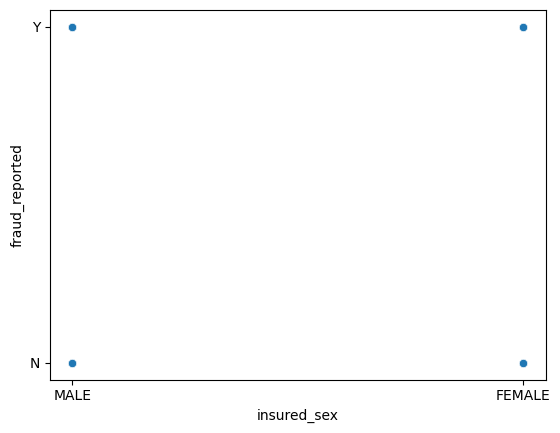

In [223]:
sns.scatterplot("insured_sex", "fraud_reported", data=data)

<AxesSubplot:xlabel='insured_education_level', ylabel='fraud_reported'>

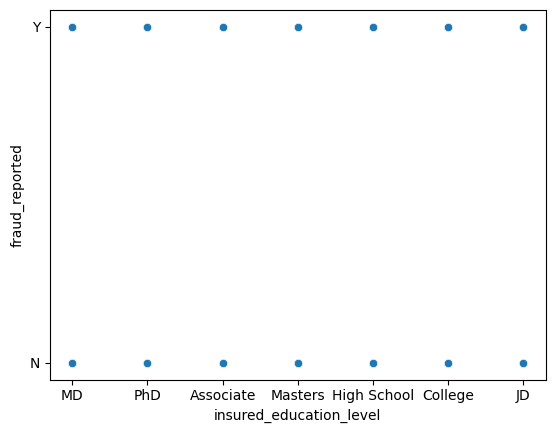

In [224]:
sns.scatterplot("insured_education_level", "fraud_reported", data=data)

<AxesSubplot:xlabel='insured_occupation', ylabel='fraud_reported'>

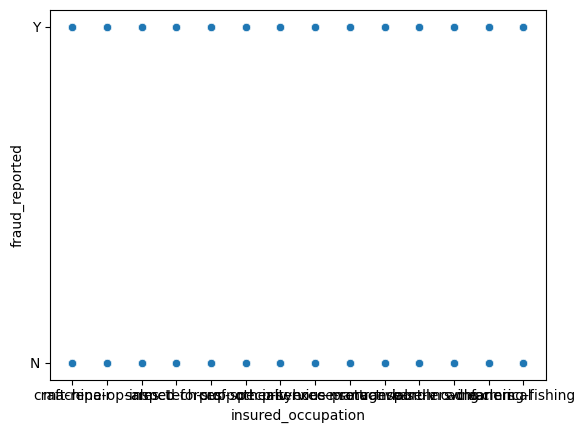

In [225]:
sns.scatterplot("insured_occupation", "fraud_reported", data=data)

<AxesSubplot:xlabel='insured_hobbies', ylabel='fraud_reported'>

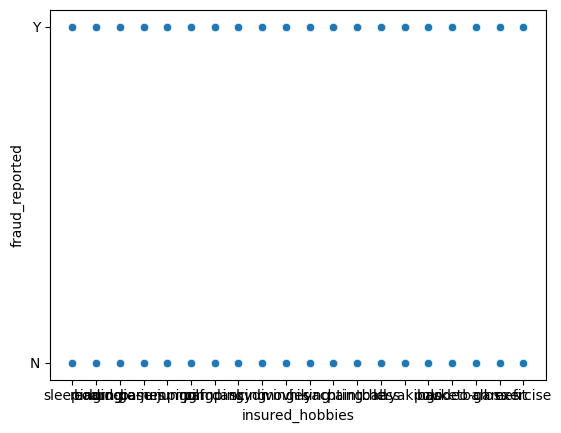

In [226]:
sns.scatterplot("insured_hobbies", "fraud_reported", data=data)

<AxesSubplot:xlabel='insured_relationship', ylabel='fraud_reported'>

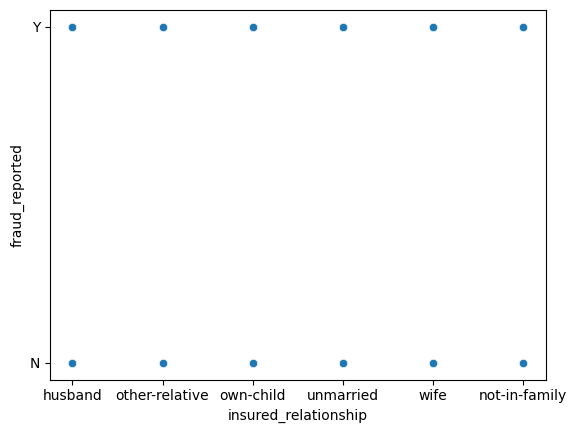

In [227]:
sns.scatterplot("insured_relationship", "fraud_reported", data=data)

<AxesSubplot:xlabel='capital-gains', ylabel='fraud_reported'>

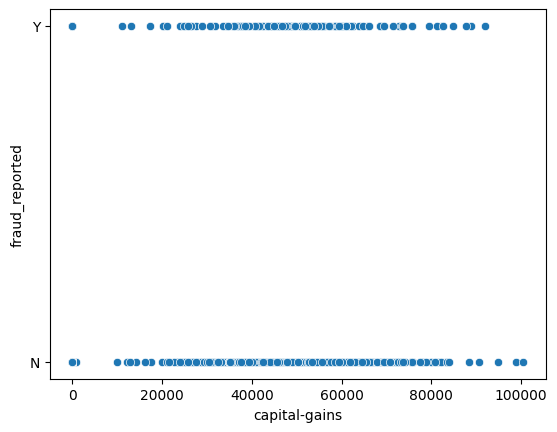

In [228]:
sns.scatterplot("capital-gains", "fraud_reported", data=data)

<AxesSubplot:xlabel='capital-loss', ylabel='fraud_reported'>

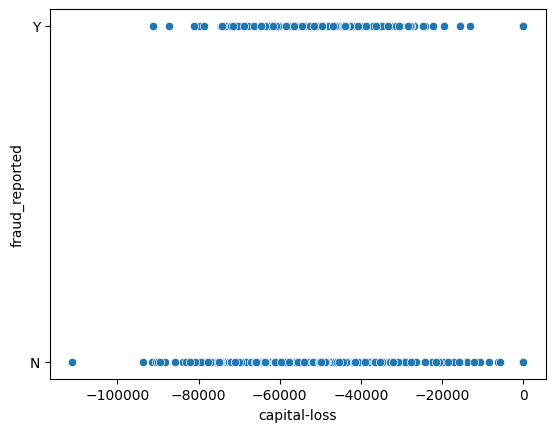

In [229]:
sns.scatterplot("capital-loss", "fraud_reported", data=data)

<AxesSubplot:xlabel='incident_date', ylabel='fraud_reported'>

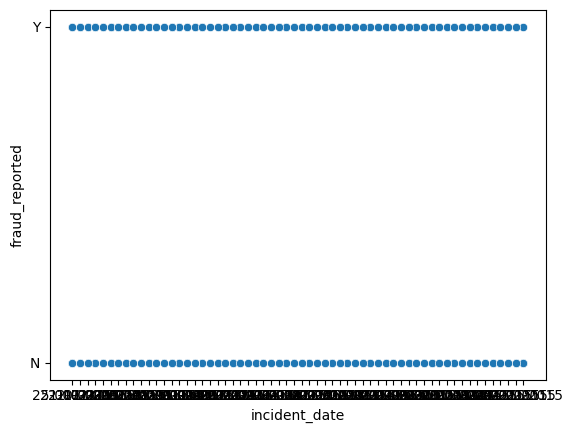

In [230]:
sns.scatterplot("incident_date", "fraud_reported", data=data)

<AxesSubplot:xlabel='incident_type', ylabel='fraud_reported'>

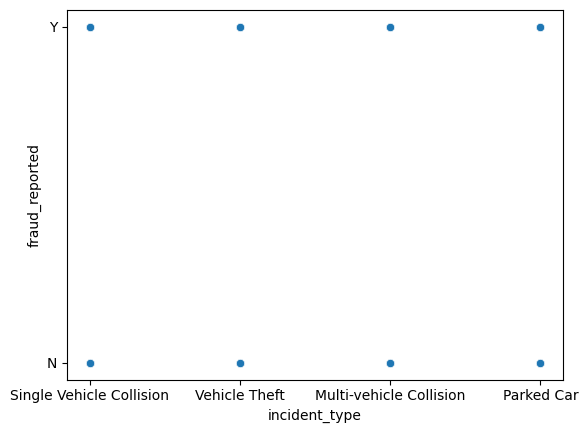

In [231]:
sns.scatterplot("incident_type", "fraud_reported", data=data)

<AxesSubplot:xlabel='collision_type', ylabel='fraud_reported'>

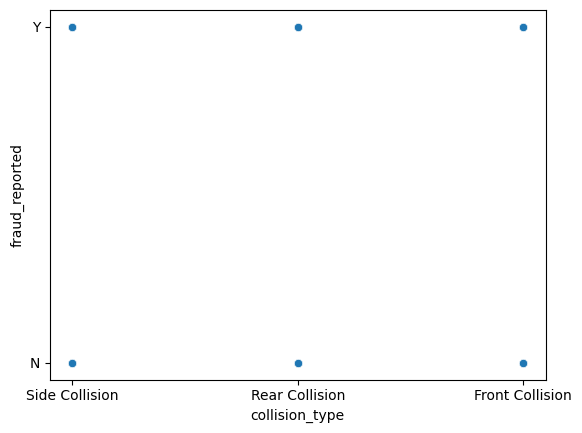

In [232]:
sns.scatterplot("collision_type", "fraud_reported", data=data)

<AxesSubplot:xlabel='incident_severity', ylabel='fraud_reported'>

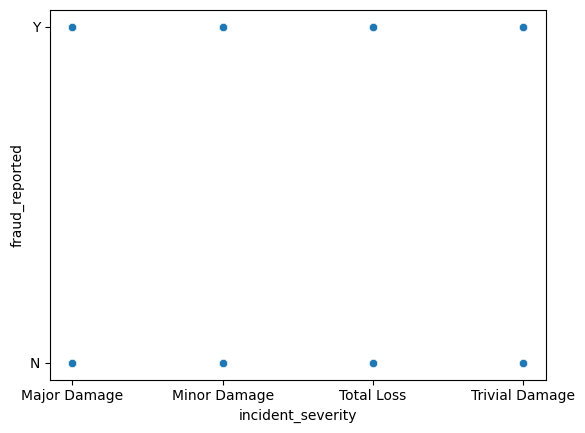

In [233]:
sns.scatterplot("incident_severity", "fraud_reported", data=data)

<AxesSubplot:xlabel='authorities_contacted', ylabel='fraud_reported'>

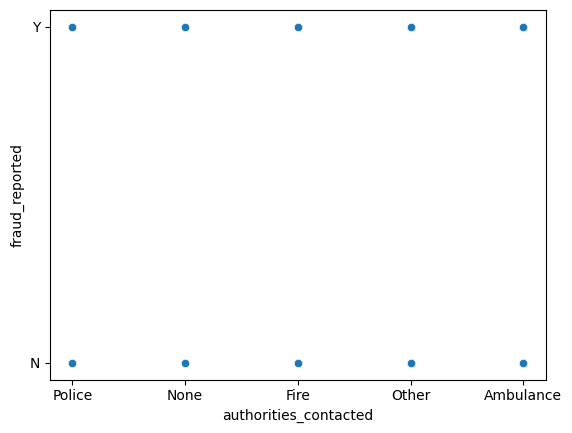

In [234]:
sns.scatterplot("authorities_contacted", "fraud_reported", data=data)

<AxesSubplot:xlabel='incident_state', ylabel='fraud_reported'>

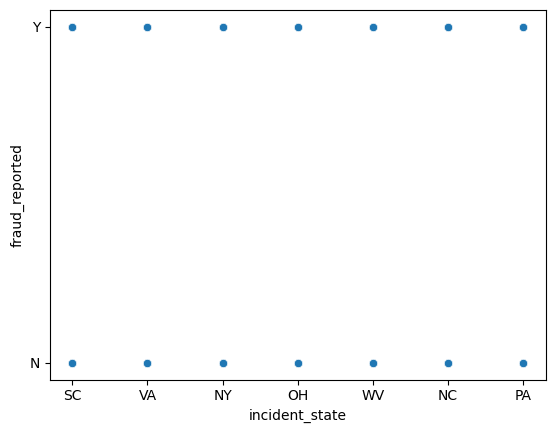

In [235]:
sns.scatterplot("incident_state", "fraud_reported", data=data)

<AxesSubplot:xlabel='incident_city', ylabel='fraud_reported'>

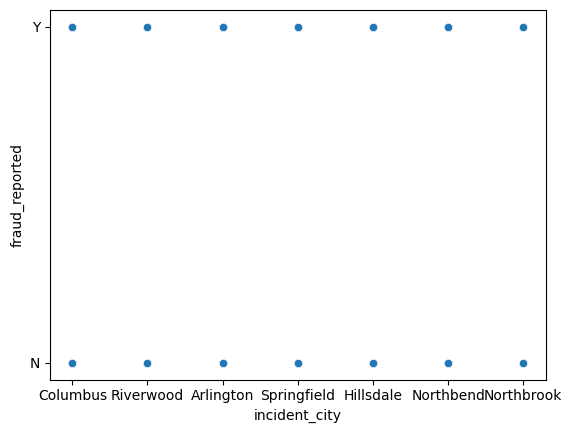

In [236]:
sns.scatterplot("incident_city", "fraud_reported", data=data)

<AxesSubplot:xlabel='incident_location', ylabel='fraud_reported'>

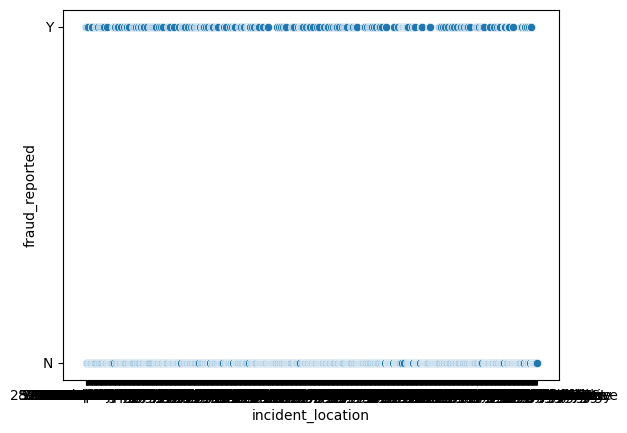

In [237]:
sns.scatterplot("incident_location", "fraud_reported", data=data)

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='fraud_reported'>

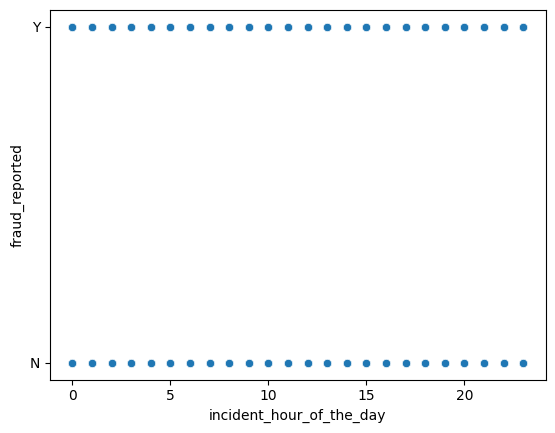

In [238]:
sns.scatterplot("incident_hour_of_the_day", "fraud_reported", data=data)

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='fraud_reported'>

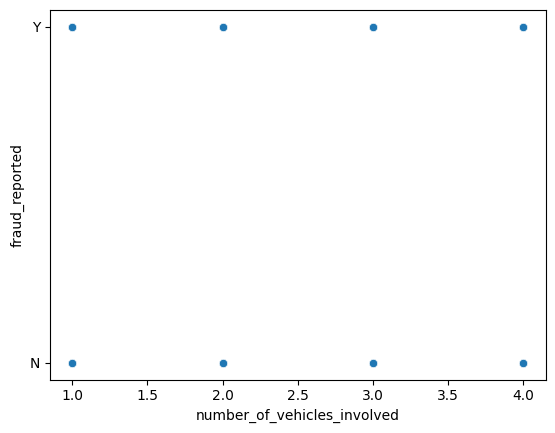

In [239]:
sns.scatterplot("number_of_vehicles_involved", "fraud_reported", data=data)

<AxesSubplot:xlabel='property_damage', ylabel='fraud_reported'>

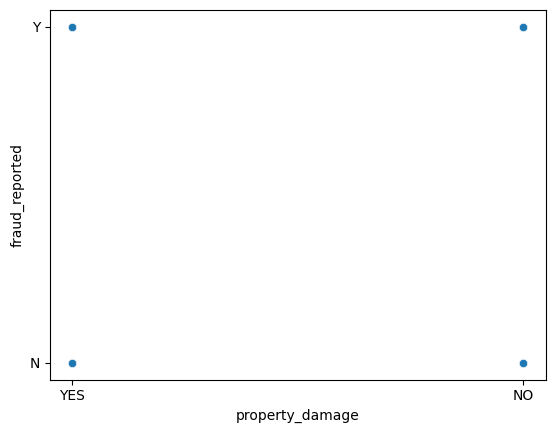

In [240]:
sns.scatterplot("property_damage", "fraud_reported", data=data)

<AxesSubplot:xlabel='bodily_injuries', ylabel='fraud_reported'>

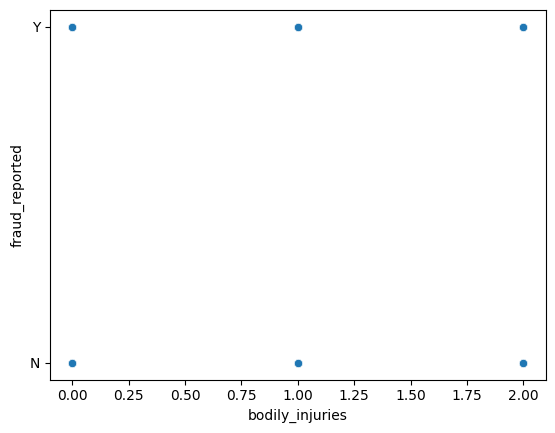

In [241]:
sns.scatterplot("bodily_injuries", "fraud_reported", data=data)

<AxesSubplot:xlabel='witnesses', ylabel='fraud_reported'>

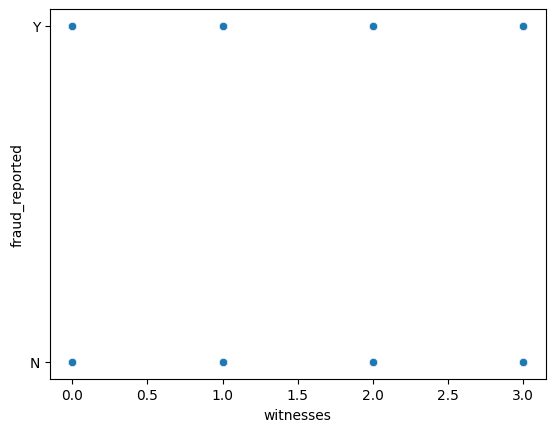

In [242]:
sns.scatterplot("witnesses", "fraud_reported", data=data)

<AxesSubplot:xlabel='police_report_available', ylabel='fraud_reported'>

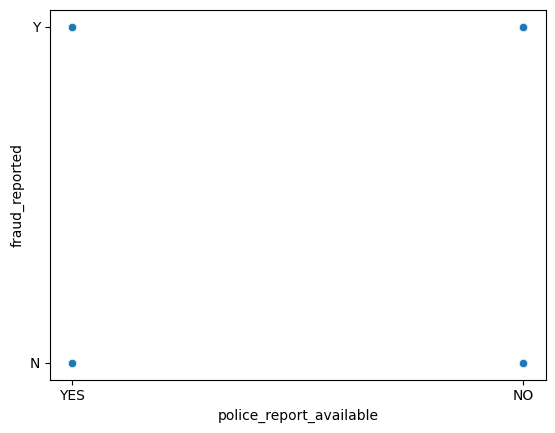

In [243]:
sns.scatterplot("police_report_available", "fraud_reported", data=data)

<AxesSubplot:xlabel='total_claim_amount', ylabel='fraud_reported'>

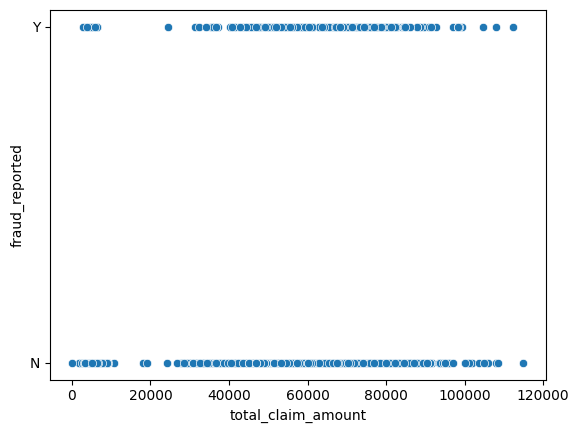

In [244]:
sns.scatterplot("total_claim_amount", "fraud_reported", data=data)

<AxesSubplot:xlabel='injury_claim', ylabel='fraud_reported'>

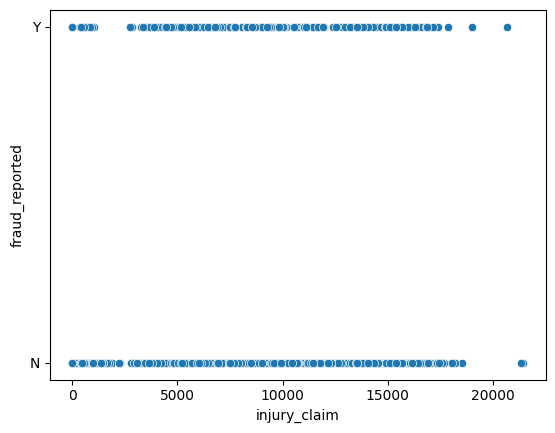

In [245]:
sns.scatterplot("injury_claim", "fraud_reported", data=data)

<AxesSubplot:xlabel='property_claim', ylabel='fraud_reported'>

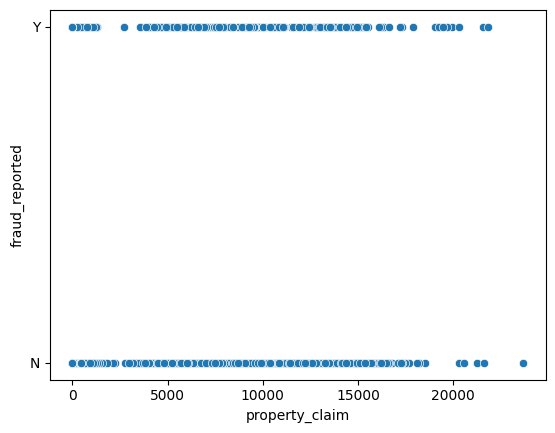

In [246]:
sns.scatterplot("property_claim", "fraud_reported", data=data)

<AxesSubplot:xlabel='vehicle_claim', ylabel='fraud_reported'>

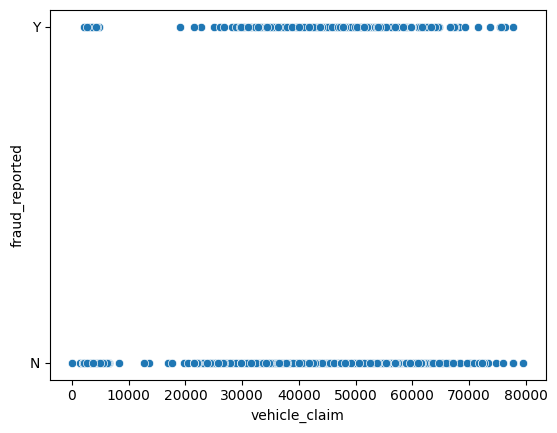

In [247]:
sns.scatterplot("vehicle_claim", "fraud_reported", data=data)

<AxesSubplot:xlabel='auto_make', ylabel='fraud_reported'>

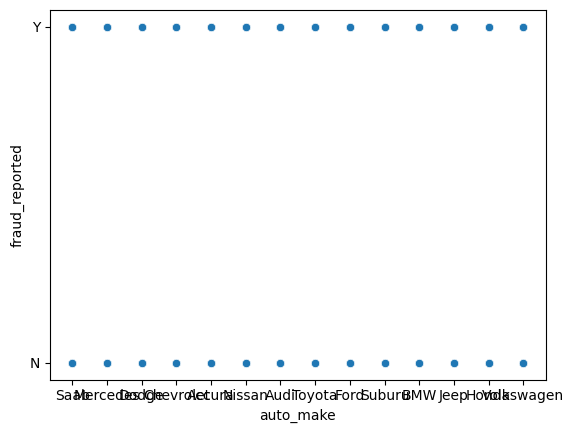

In [248]:
sns.scatterplot("auto_make", "fraud_reported", data=data)

<AxesSubplot:xlabel='auto_model', ylabel='fraud_reported'>

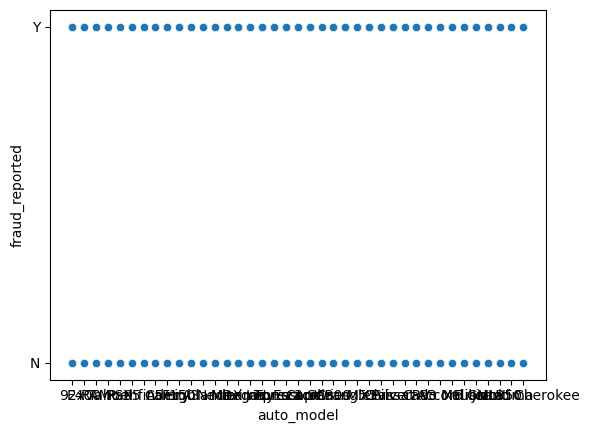

In [249]:
sns.scatterplot("auto_model", "fraud_reported", data=data)

<AxesSubplot:xlabel='auto_year', ylabel='fraud_reported'>

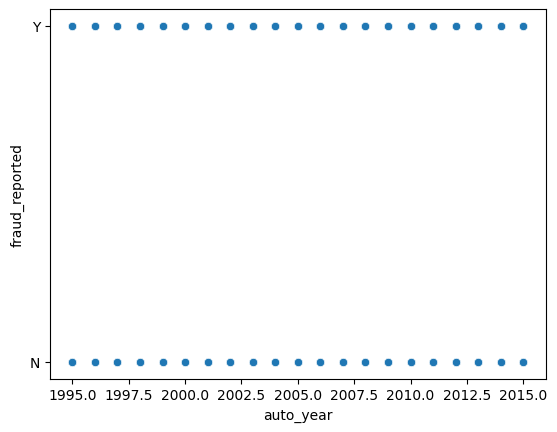

In [250]:
sns.scatterplot("auto_year", "fraud_reported", data=data)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                      NO               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                      NO              87200   
996       608177  ...         3                      NO             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                      NO               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

# encoding

In [252]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [253]:
le = LabelEncoder()
oe = OrdinalEncoder()
data["fraud_reported"] = le.fit_transform(data["fraud_reported"])

In [254]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = oe.fit_transform(data[i].values.reshape(-1,1))

In [255]:
data

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585             532.0           2.0   
1                   228   42         342868             821.0           1.0   
2                   134   29         687698             186.0           2.0   
3                   256   41         227811             766.0           0.0   
4                   228   44         367455             181.0           0.0   
..                  ...  ...            ...               ...           ...   
995                   3   38         941851             487.0           2.0   
996                 285   41         186934             129.0           0.0   
997                 130   34         918516             509.0           2.0   
998                 458   62         533940             573.0           0.0   
999                 456   60         556080             359.0           2.0   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1.0               1000                1406.91               0   
1           1.0               2000                1197.22         5000000   
2           0.0               2000                1413.14         5000000   
3           1.0               2000                1415.74         6000000   
4           2.0               1000                1583.91         6000000   
..          ...                ...                    ...             ...   
995         2.0               1000                1310.80               0   
996         0.0               1000                1436.79               0   
997         1.0                500                1383.49         3000000   
998         2.0               2000                1356.92         5000000   
999         1.0               1000                 766.19               0   

     insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0         466132  ...          2                      1.0               71610   
1         468176  ...          0                      0.0                5070   
2         430632  ...          3                      0.0               34650   
3         608117  ...          2                      0.0               63400   
4         610706  ...          1                      0.0                6500   
..           ...  ...        ...                      ...                 ...   
995       431289  ...          1                      0.0               87200   
996       608177  ...          3                      0.0              108480   
997       442797  ...          3                      1.0               67500   
998       441714  ...          1                      1.0               46980   
999       612260  ...          3                      0.0                5060   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0            6510           13020          52080       10.0         1.0   
1             780             780           3510        8.0        12.0   
2            7700            3850          23100        4.0        30.0   
3            6340            6340          50720        3.0        34.0   
4            1300             650           4550        0.0        31.0   
..            ...             ...            ...        ...         ...   
995         17440            8720          61040        6.0         6.0   
996         18080           18080          72320       13.0        28.0   
997          7500            7500          52500       11.0        19.0   
998          5220            5220          36540        1.0         5.0   
999           460             920           3680        8.0        12.0   

     auto_year  fraud_reported  
0         2004               1  
1         2007               1  
2         2007               0  
3         2014               1  
4         2009               0  
..         ...             ...  
995       2006            

# correlation 

In [267]:
corr = data.corr()
corr

months_as_customer  policy_number  \
months_as_customer                     1.000000       0.057555   
policy_number                          0.057555       1.000000   
policy_bind_date                       0.055055       0.045713   
policy_state                          -0.000328       0.072815   
policy_csl                            -0.026819       0.038917   
policy_deductable                      0.026807      -0.006738   
policy_annual_premium                  0.005018       0.022566   
umbrella_limit                         0.015498       0.008968   
insured_zip                            0.017895       0.007083   
insured_sex                            0.060925       0.004564   
insured_education_level               -0.000833      -0.037264   
insured_occupation                     0.009814      -0.014422   
insured_hobbies                       -0.093661       0.039896   
insured_relationship                   0.069727       0.017120   
capital-gains                          0.006399       0.009802   
capital-loss                           0.020209      -0.005669   
incident_date                         -0.002985       0.053022   
incident_type                         -0.017377       0.001742   
collision_type                        -0.072787      -0.003338   
incident_severity                     -0.059581      -0.015719   
authorities_contacted                  0.010021       0.018565   
incident_state                         0.005369      -0.010064   
incident_city                         -0.000130      -0.035406   
incident_location                     -0.013630       0.016393   
incident_hour_of_the_day               0.070639       0.000113   
number_of_vehicles_involved            0.014736       0.013432   
property_damage                        0.005488      -0.019923   
bodily_injuries                       -0.010162      -0.004558   
witnesses                              0.058383      -0.012661   
police_report_available               -0.022146       0.031190   
injury_claim                           0.065329      -0.008762   
property_claim                         0.034940      -0.010678   
vehicle_claim                          0.061013      -0.020184   
auto_make                              0.047655       0.023860   
auto_model                             0.004202       0.065240   
auto_year                             -0.000292      -0.000183   
fraud_reported                         0.020544      -0.029443   

                             policy_bind_date  policy_state  policy_csl  \
months_as_customer                   0.055055     -0.000328   -0.026819   
policy_number                        0.045713      0.072815    0.038917   
policy_bind_date                     1.000000      0.015289    0.008486   
policy_state                         0.015289      1.000000    0.001027   
policy_csl                           0.008486      0.001027    1.000000   
policy_deductable                   -0.001721      0.010033    0.003384   
policy_annual_premium               -0.037733      0.012455    0.023978   
umbrella_limit                      -0.024866     -0.029580    0.021636   
insured_zip                         -0.042749      0.008777    0.006879   
insured_sex                          0.039338     -0.020481   -0.010757   
insured_education_level              0.040606     -0.034327    0.009153   
insured_occupation                   0.006720     -0.031215    0.015788   
insured_hobbies                      0.020085     -0.038689   -0.005960   
insured_relationship                 0.017710     -0.018506   -0.030063   
capital-gains                       -0.004535      0.074551    0.005249   
capital-loss                        -0.026123     -0.030338   -0.034612   
incident_date                        0.008022      0.027287   -0.010140   
incident_type                        0.000164      0.031848    0.011997   
collision_type                      -0.002038      0.052438    0.020641   
incident_severity   

<AxesSubplot:>

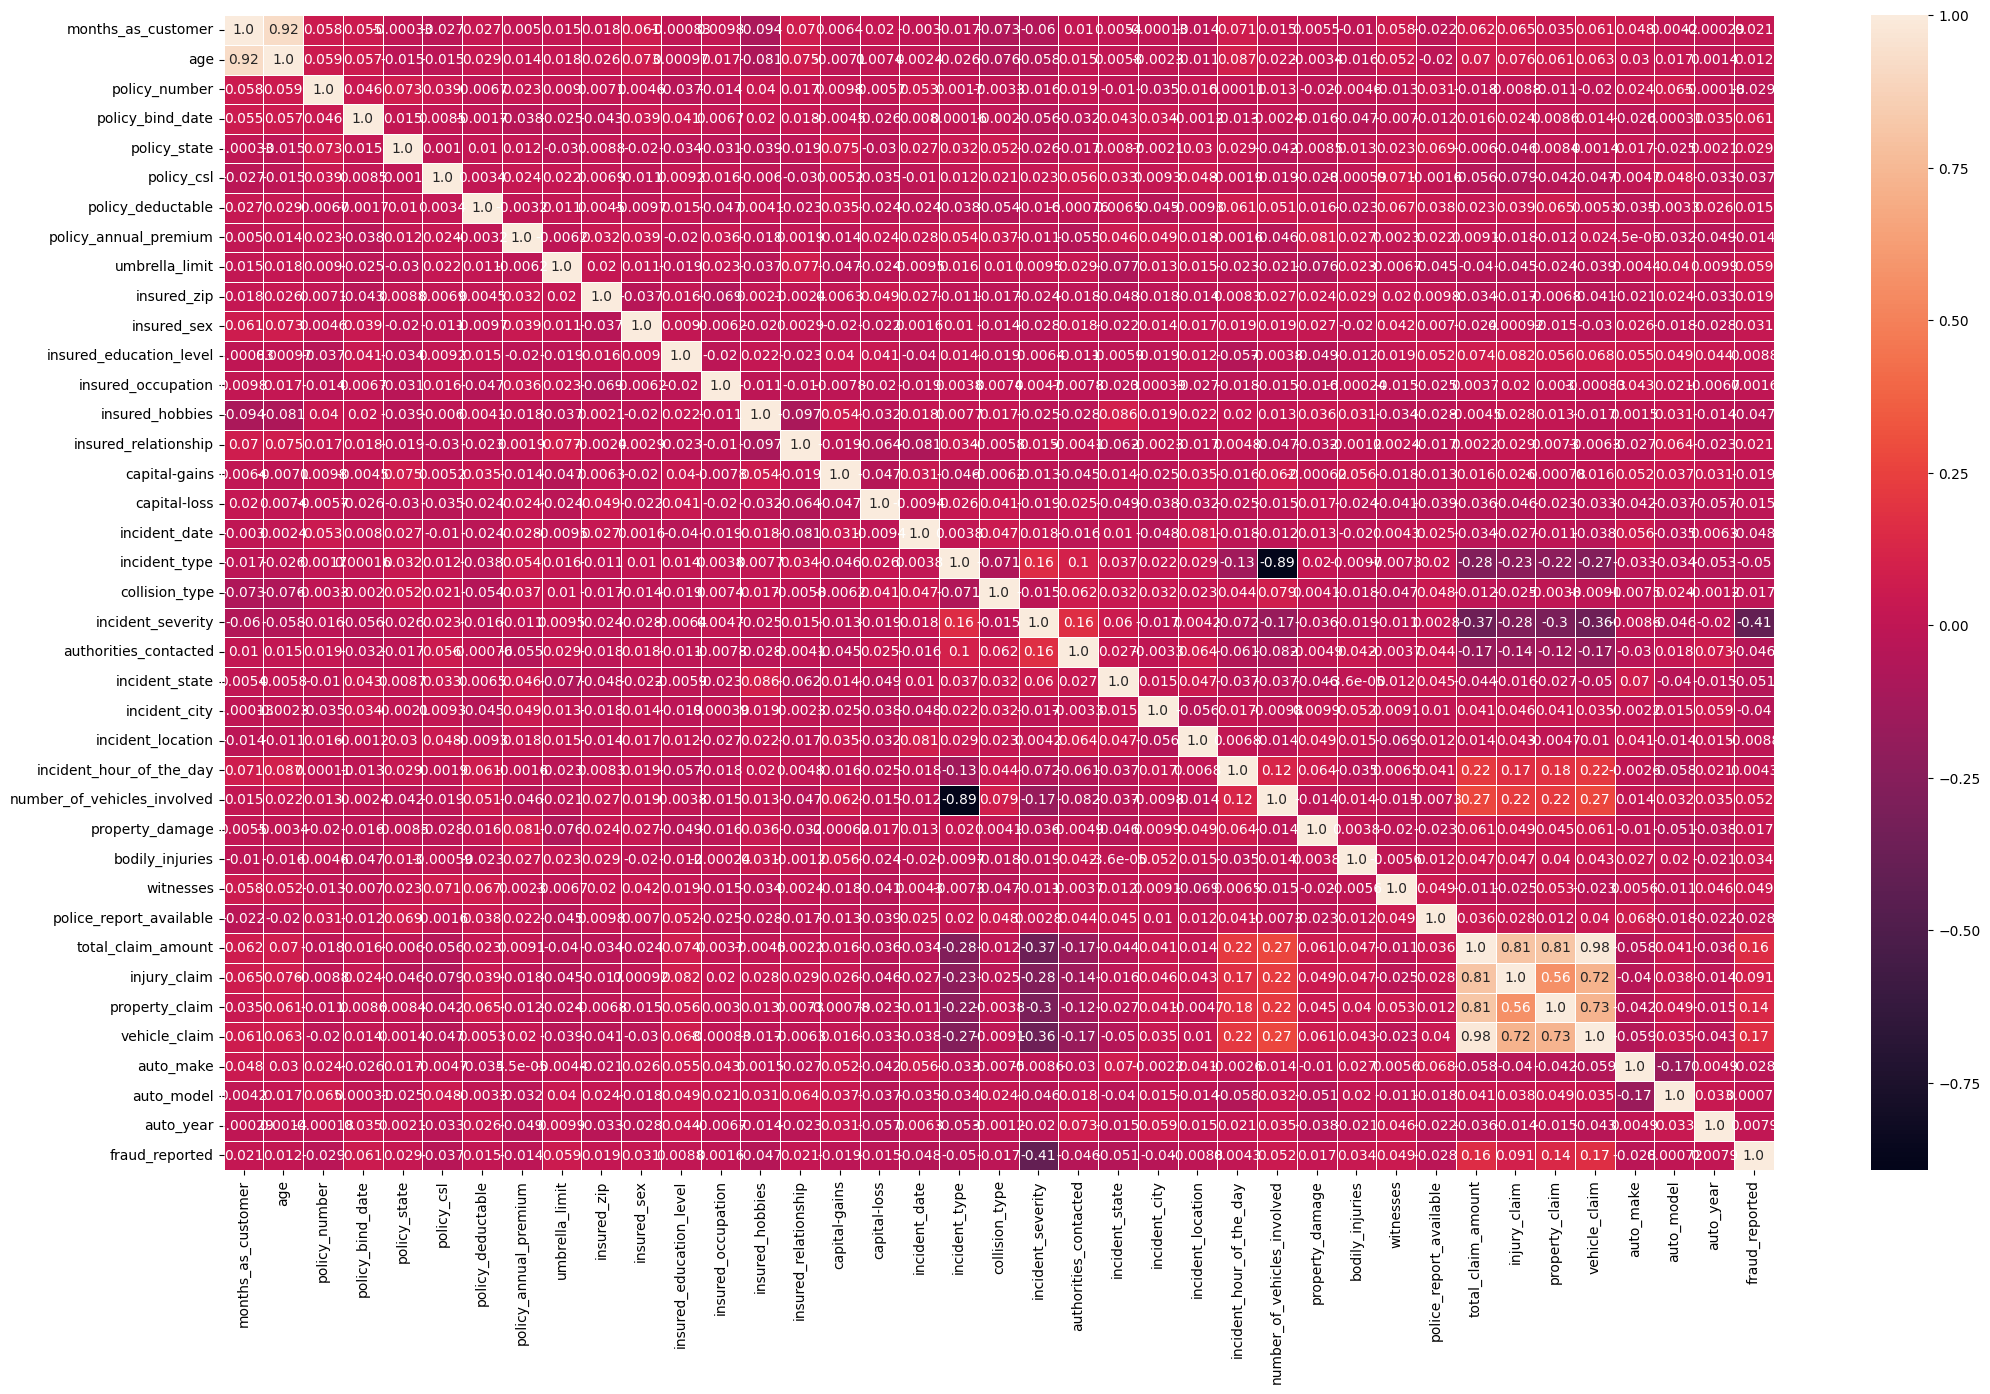

In [260]:
plt.figure(figsize =  (25, 15))
sns.heatmap(corr,annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.2')

In [ ]:
data.drop(["total_claim_amount" ] ,  axis = 1 , inplace  = True )

In [266]:
data.drop(["age" ] ,  axis = 1 , inplace  = True )

# skewness

In [269]:
data.skew()

months_as_customer             0.362177
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584


outliers 

In [272]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(data))
data.shape

(1000, 37)

In [273]:
threshold = 3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 31,  7,  7,  7,  6, 15,
        7,  7,  7], dtype=int64))


In [275]:
len(np.where(z>3)[0])

20

In [277]:
df = data[(z<3).all(axis=1)]

In [278]:
df.shape

(980, 37)

In [279]:
df

months_as_customer  policy_number  policy_bind_date  policy_state  \
0                   328         521585             532.0           2.0   
1                   228         342868             821.0           1.0   
2                   134         687698             186.0           2.0   
3                   256         227811             766.0           0.0   
4                   228         367455             181.0           0.0   
..                  ...            ...               ...           ...   
995                   3         941851             487.0           2.0   
996                 285         186934             129.0           0.0   
997                 130         918516             509.0           2.0   
998                 458         533940             573.0           0.0   
999                 456         556080             359.0           2.0   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1.0               1000                1406.91               0   
1           1.0               2000                1197.22         5000000   
2           0.0               2000                1413.14         5000000   
3           1.0               2000                1415.74         6000000   
4           2.0               1000                1583.91         6000000   
..          ...                ...                    ...             ...   
995         2.0               1000                1310.80               0   
996         0.0               1000                1436.79               0   
997         1.0                500                1383.49         3000000   
998         2.0               2000                1356.92         5000000   
999         1.0               1000                 766.19               0   

     insured_zip  insured_sex  ...  bodily_injuries  witnesses  \
0         466132          1.0  ...                1          2   
1         468176          1.0  ...                0          0   
2         430632          0.0  ...                2          3   
3         608117          0.0  ...                1          2   
4         610706          1.0  ...                0          1   
..           ...          ...  ...              ...        ...   
995       431289          0.0  ...                0          1   
996       608177          0.0  ...                2          3   
997       442797          0.0  ...                2          3   
998       441714          1.0  ...                0          1   
999       612260          0.0  ...                0          3   

     police_report_available  injury_claim  property_claim  vehicle_claim  \
0                        1.0          6510           13020          52080   
1                        0.0           780             780           3510   
2                        0.0          7700            3850          23100   
3                        0.0          6340            6340          50720   
4                        0.0          1300             650           4550   
..                       ...           ...             ...            ...   
995                      0.0         17440            8720          61040   
996                      0.0         18080           18080          72320   
997                      1.0          7500            7500          52500   
998                      1.0          5220            5220          36540   
999                      0.0           460             920           3680   

     auto_make  auto_model  auto_year  fraud_reported  
0         10.0         1.0       2004               1  
1          8.0        12.0       2007               1  
2          4.0        30.0       2007               0  
3          3.0        34.0       2014               1  
4          0.0        31.0       2009               0  
..         ...         ...        ...             ...  
995        6.0         6.0       2006               0  
996       13.0        28.

# x and y 

In [280]:
x =  data.drop   (["fraud_reported"]   ,  axis = 1)

In [281]:
y =  data["fraud_reported"]

# scaling 

In [282]:
from sklearn.preprocessing import StandardScaler


In [283]:


t = StandardScaler()

In [284]:
x = t .  fit_transform(x)

In [285]:
x

array([[ 1.07813958, -0.09595307,  0.20949985, ...,  0.85646614,
        -1.64574255, -0.1834404 ],
       [ 0.2089946 , -0.79152739,  1.25939678, ...,  0.36053902,
        -0.65747047,  0.31549088],
       [-0.60800168,  0.55056594, -1.04747018, ..., -0.63131523,
         0.95970204,  0.31549088],
       ...,
       [-0.64276748,  1.44891961,  0.12594404, ...,  1.1044297 ,
        -0.02857005, -1.5139238 ],
       [ 2.20802805, -0.04786687,  0.35844716, ..., -1.37520591,
        -1.28637088, -1.18130295],
       [ 2.19064515,  0.03830297, -0.41898517, ...,  0.36053902,
        -0.65747047,  0.31549088]])

# smote

In [289]:
from imblearn.over_sampling import RandomOverSampler

In [290]:
t  = RandomOverSampler ()

In [291]:
x , y = t .  fit_resample(x,y)

In [292]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

# test train

In [293]:

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [294]:
lc = LogisticRegression()

In [295]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .20)
    lc.fit(x_train,y_train)
    pred_train = lc.predict(x_train)
    pred_test = lc.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  73.00664451827242
 testing  score is  0 is 66.55629139072848 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  73.83720930232558
 testing  score is  1 is 72.84768211920529 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  72.8405315614618
 testing  score is  2 is 70.52980132450331 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  72.00996677740864
 testing  score is  3 is 74.50331125827815 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  73.08970099667775
 testing  score is  4 is 73.50993377483444 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  73.50498338870432
 testing  score is  5 is 72.18543046357617 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  73.421926910299
 testing  score is 

 testing  score is  60 is 70.19867549668875 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  73.08970099667775
 testing  score is  61 is 73.84105960264901 

at random state 62 model preforms best
at random_state =   62
training score at 62 is  72.50830564784053
 testing  score is  62 is 71.52317880794702 

at random state 63 model preforms best
at random_state =   63
training score at 63 is  73.421926910299
 testing  score is  63 is 69.5364238410596 

at random state 64 model preforms best
at random_state =   64
training score at 64 is  74.00332225913621
 testing  score is  64 is 67.54966887417218 

at random state 65 model preforms best
at random_state =   65
training score at 65 is  74.00332225913621
 testing  score is  65 is 67.88079470198676 

at random state 66 model preforms best
at random_state =   66
training score at 66 is  72.25913621262458
 testing  score is  66 is 72.18543046357617 

at random state 67 model preforms best
at random_st

In [296]:
x_train,x_test,y_train,y_test = train_test_split( x , y , random_state =  87, test_size = .20)
lc.fit(x_train,y_train)
pred_train = lc.predict(x_train)
pred_test = lc.predict(x_test)
print("training score is " ,accuracy_score(y_train, pred_train))
print(" testing  score is" , accuracy_score(y_test, pred_test))

training score is  0.7250830564784053
 testing  score is 0.6986754966887417


# random forest 

In [297]:
from sklearn.ensemble import RandomForestClassifier


In [298]:
random = RandomForestClassifier()

In [299]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .20)
    random.fit(x_train,y_train)
    pred_train = random.predict(x_train)
    pred_test = random.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  100.0
 testing  score is  0 is 91.05960264900662 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  100.0
 testing  score is  1 is 90.06622516556291 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  100.0
 testing  score is  2 is 91.05960264900662 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  100.0
 testing  score is  3 is 91.05960264900662 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  100.0
 testing  score is  4 is 90.72847682119205 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  100.0
 testing  score is  5 is 94.37086092715232 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  100.0
 testing  score is  6 is 90.06622516556291 

at random state 7 model preforms best
at random_state =

at random state 60 model preforms best
at random_state =   60
training score at 60 is  100.0
 testing  score is  60 is 90.06622516556291 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  100.0
 testing  score is  61 is 89.40397350993378 

at random state 62 model preforms best
at random_state =   62
training score at 62 is  100.0
 testing  score is  62 is 93.70860927152319 

at random state 63 model preforms best
at random_state =   63
training score at 63 is  100.0
 testing  score is  63 is 88.0794701986755 

at random state 64 model preforms best
at random_state =   64
training score at 64 is  100.0
 testing  score is  64 is 90.72847682119205 

at random state 65 model preforms best
at random_state =   65
training score at 65 is  100.0
 testing  score is  65 is 91.72185430463577 

at random state 66 model preforms best
at random_state =   66
training score at 66 is  100.0
 testing  score is  66 is 92.71523178807946 

at random state 67 model pre

In [301]:
x_train,x_test,y_train,y_test = train_test_split( x , y , random_state =  91, test_size = .20)
random.fit(x_train,y_train)
pred_train = random.predict(x_train)
pred_test = random.predict(x_test)
print("training score is " ,accuracy_score(y_train, pred_train))
print(" testing  score is" , accuracy_score(y_test, pred_test))

training score is  1.0
 testing  score is 0.9470198675496688


In [302]:
pred_test_extra = accuracy_score(y_test, pred_test)


In [303]:
print(classification_report(y_test, pred_test))
print(confusion_matrix (y_test, pred_test),"\n")
print(accuracy_score(y_test,pred_test),"\n")

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       143
           1       0.94      0.96      0.95       159

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302

[[134   9]
 [  7 152]] 

0.9470198675496688 



In [304]:
from sklearn.naive_bayes import GaussianNB


In [305]:
nb = GaussianNB()

In [306]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .20)
    nb.fit(x_train,y_train)
    pred_train = nb.predict(x_train)
    pred_test = nb.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  71.76079734219269
 testing  score is  0 is 65.89403973509934 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  71.09634551495017
 testing  score is  1 is 70.52980132450331 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  71.67774086378738
 testing  score is  2 is 66.22516556291392 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  70.34883720930233
 testing  score is  3 is 72.18543046357617 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  70.34883720930233
 testing  score is  4 is 72.18543046357617 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  70.84717607973423
 testing  score is  5 is 70.52980132450331 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  71.59468438538205
 testing  score 

training score at 58 is  71.01328903654485
 testing  score is  58 is 65.23178807947019 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  71.67774086378738
 testing  score is  59 is 66.22516556291392 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  70.59800664451828
 testing  score is  60 is 70.19867549668875 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  70.59800664451828
 testing  score is  61 is 73.17880794701986 

at random state 62 model preforms best
at random_state =   62
training score at 62 is  70.84717607973423
 testing  score is  62 is 68.87417218543047 

at random state 63 model preforms best
at random_state =   63
training score at 63 is  71.2624584717608
 testing  score is  63 is 67.88079470198676 

at random state 64 model preforms best
at random_state =   64
training score at 64 is  70.7641196013289
 testing  score is  64 is 66.88741721854305 

at rand

In [307]:
x_train,x_test,y_train,y_test = train_test_split( x , y , random_state =  74, test_size = .20)
nb.fit(x_train,y_train)
pred_train = nb.predict(x_train)
pred_test = nb.predict(x_test)
print("training score is " ,accuracy_score(y_train, pred_train))
print(" testing  score is" , accuracy_score(y_test, pred_test))

training score is  0.7009966777408638
 testing  score is 0.7317880794701986


cross validation for rndom forest 

In [308]:
from sklearn.model_selection import cross_val_score

for j in range(2,15):
    ls_score = cross_val_score(random,x,y,cv = j)
    lsc =  ls_score.mean()
    print("at cv :" , j)
    print("cross validation score is :" , lsc*100)
    print("accuracy is  = ", pred_test_extra *100)
    print("\n")

at cv : 2
cross validation score is : 91.16865869853918
accuracy is  =  94.70198675496688


at cv : 3
cross validation score is : 92.49667994687914
accuracy is  =  94.70198675496688


at cv : 4
cross validation score is : 92.29940318302387
accuracy is  =  94.70198675496688


at cv : 5
cross validation score is : 92.82920067765286
accuracy is  =  94.70198675496688


at cv : 6
cross validation score is : 92.82868525896414
accuracy is  =  94.70198675496688


at cv : 7
cross validation score is : 92.96296296296298
accuracy is  =  94.70198675496688


at cv : 8
cross validation score is : 93.23004615557807
accuracy is  =  94.70198675496688


at cv : 9
cross validation score is : 92.89951842347051
accuracy is  =  94.70198675496688


at cv : 10
cross validation score is : 93.03178807947019
accuracy is  =  94.70198675496688


at cv : 11
cross validation score is : 93.02861157734495
accuracy is  =  94.70198675496688


at cv : 12
cross validation score is : 92.76878306878308
accuracy is  =  94.70

In [312]:
cross = cross_val_score(random,x,y,cv = 13)
cross.mean()

0.934275170107254

tuninh

In [313]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


In [316]:
gird_parameter = {  'criterion' : ["gini", "entropy"] , "max_features" : ["log2" , "sqrt", "auto"] ,
             'max_features': ['log2', 'sqrt'],
             'min_samples_leaf': [2, 10, 30] } 
random = RandomForestClassifier()

In [318]:
clf = GridSearchCV(random,gird_parameter , scoring = accuracy_score , n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 2}


In [319]:
ext = RandomForestClassifier(criterion = "gini" , max_features = "log2", min_samples_leaf= 2 )
ext.fit(x_train,y_train)
pred_train = ext.predict(x_train)
pred_test = ext.predict(x_test)
print(classification_report(y_test, pred_test))
print(confusion_matrix (y_test, pred_test),"\n")
print(accuracy_score(y_test,pred_test),"\n")

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       160
           1       0.87      0.96      0.91       142

    accuracy                           0.91       302
   macro avg       0.92      0.92      0.91       302
weighted avg       0.92      0.91      0.91       302

[[140  20]
 [  6 136]] 

0.9139072847682119 



roc auc

In [320]:

from sklearn.metrics  import roc_curve,auc

from sklearn.metrics  import roc_curve,auc

y_precict_proba = clf.predict_proba(x_test)[:,1]
fpr , tpr , threshold = roc_curve(y_test,y_precict_proba , pos_label=1)
roc_auc  =  auc(fpr,tpr)
roc_auc
roc_auc

0.9837588028169013

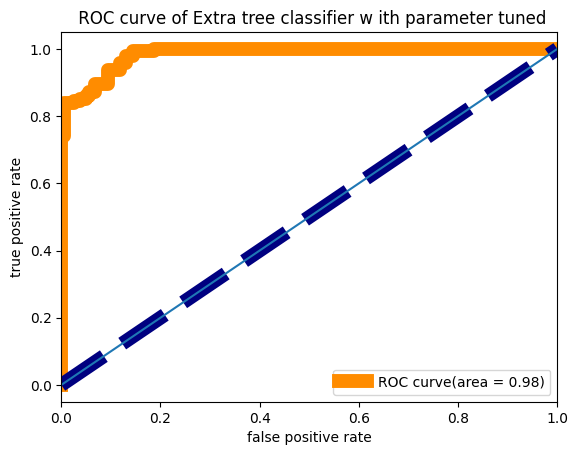

In [321]:
plt.figure()
plt.plot(fpr,tpr,color ="darkorange",lw = 10, label = "ROC curve(area = %0.2f)"%roc_auc)
plt.plot([0,1],[0,1]  , color = "navy" , lw = 10 ,  linestyle = "--" )
plt.xlim ([0.0 ,1.0] )
plt.plot([0.0 , 1.0])
plt.xlabel("false positive rate" )
plt.ylabel("true positive rate" )
plt.title (" ROC curve of Extra tree classifier w ith parameter tuned")
plt.legend(loc="lower right")


plt.show()

In [ ]:
import pickle
filename = "rainfall.pkl"
pickle.dump(ext, open(filename,"wb"))